### MAP@7 평가척도 
1. 예측 갯수로 나누는 게 아니라 정답의 갯수로 나눈다.
2. 예측의 순서에 매우 예민한 평가척도 - 정답을 앞쪽에 예측하는 것이 더 좋은 점수를 받을 수 있음


In [0]:
import numpy as np

def apk(actual, predicted, k = 7, default = 0.0):
    # MAP@7이므로, 최대 7개만 사용한다.
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        # 점수를 부여하는 조건은 다음과 같다 :
        # 예측 값이 정답에 있고('p in actual')
        # 예측 값이 중복이 아니면 ('p not in predicted[:i]')
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
        
    # 정답 값이 공백일 경우, 무조건 0.0점을 반환
    if not actual:
        return default

    # 정답의 개수(len(actual))로 average precision을 구한다
    return score / min(len(actual), k)
    
def mapk(actual, predicted, k = 7, default = 0.0):
    # list of list인 정답 값(actual)과 예측 값(predicted)에서 고객별 Average Precision을 구하고, np.mean()을 통해 평균을 계산한다.
    return np.mean([apk(a, p, k, default) for a, p in zip(actual, predicted)])
    

Tabular 형태의 시계열 데이터를 다루는 경진대회에서는 딥러닝 모델보다 트리 기반의 앙상블 모델이 더 좋은 성능을 낸다.

sklearn 라이브러리에서 DecisionTree, RandomForest, ExtraTress, AdaBoost, GradientBoosting 등 다양한 트리 모델 지원, 

여기서는 XGBoost, LightGBM 사용

![대체 텍스트](https://www.kdnuggets.com/wp-content/uploads/xgb1.png)

### XGBoost란?

XGBoost는 2016년 3월에 워싱턴대학교에 재학 중인 박사과정 학생인 Tianqi Chen이 개발 및 발표한 Boosting Tree 모델이다.

홈페이지 : http://xgboost.readthedocs.io/en/latest

Github : https://github.com/dmlc/xgboost/tree/master/demo

참조논문 : https://arxiv.org/pdf/1603.02754.pdf
(XGBoost : A scalable Tree Boosting System by Tianqi Chen)

![대체 텍스트](https://cdn-images-1.medium.com/fit/t/1600/480/0*Q1DUD6HIeksecpPq)

### LightGBM이란?

LightGBM은 2016년 12월 Microsoft에서 개발 및 발표한 Boosting Tree 모델이다.

github : https://github.com/microsoft/LightGBM

참조논문 : https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf


![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/995D67335C46BA4114)



### Boosting Tree 모델이란?

데이터에 하나의 트리 모델을 학습시킨 후, 해당 트리 모델의 성능이 낮은 부분을 보완하는 다른 트리 모델을 학습시키는 방식으로 수많은 트리 모델을 순차적으로 학습시키며 성능을 개선하는 모델. 하나의 Boosting Tree 모델에 수십 개, 수백 개 혹은 수천 개의 트리 모델이 사용됨.


![대체 텍스트](http://img.khan.co.kr/news/2017/12/15/l_2017121601001930100150271.jpg)

부스팅의 가장 큰 특징

- 다음 단계의 weak classifier가 이전 단계의 weak classifier의 영향을 받는다.
- 즉, 이전 classifier의 양상을 보고 보다 잘 맞출 수 있는 방향으로 다음 단계를 행하고 각 classifier의 weight를 업데이트


![대체 텍스트](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)

1. AdaBoost : 다수결을 통한 정답 분류 및 오답에 가중치 부여

2. Gradient Boost : Loss function의 Gradient를 통해 오답에 가중치를 부여

3. XGBoost : GBM 대비 성능 향상 및 병렬처리 기능 추가

4. LightGBM : XGBoost 대비 성능 향상 및 대용량 병렬 처리 기능 추가


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

trn = pd.read_csv('/content/drive/My Drive/ML/kaggle/santander_product_recommendation/input/train_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
trn.shape

(13647309, 48)

In [0]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### for loop로 모든 변수의 첫 5줄 미리보기
- 데이터 타입도 확인 가능

In [0]:
for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

age : 정수인 듯 하지만, object형이므로 정수로 전환 필요

fecha_ato : 날짜를 기록하는 이 변수의 타입이 object이므로 datatime으로 변환해주어야 한다.

renta : 결측값 처리 필요

In [0]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

#### .info()함수를 통해 훈련 데이터의 메모리양도 확인 가능

csv파일 용량은 2.2GB, pandas를 통해 읽어오면 총 4.9GB 메모리 사용
-> 불필요한 변수명 제거 및 데이터 타입을 적절히 변경해 메모리를 더 효율적으로 사용가능


### 수치형 / 범주형 변수


#### describe()를 통해 수치형 변수를 살펴보기

In [0]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


- ncodpers : 최솟값 15889 ~ chleotrkqt 1553689 을 갖는 고객 고유 식별 번호

- ind_nuevo : 최소 75%의 값이 0이며, 나머지가 값 1을 갖는 신규 고객 지표

- indrel : 최소 75%의 값이 1이며, 나머지가 값 99를 가지는 고객 등급 변수

- tipodom : 모든 값이 1인 주소 유형 변수. 이러한 변수는 학습에 도움이 되지 않는 변수. 모든 값이 상수일 경우는 변수로서 식별력이 없기 때문

- cod_prov : 최소 1 ~ 최대 52의 값을 가지며, 수치형이지만 범주형 변수로서 의미를 가지는 지방 코드 변수

- ind_actividad_cliente : 최소 50%의 값이 0이며, 나머지가 값 1을 가지는 활발성 지표

- renta : 최소 1202.73 ~ 최대 28894400의 값을 가지는 전형적인 수치형 변수, 가구 총 수입을 나타냄

### 범주형 변수

In [0]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


### 범주형 변수의 고유값을 직접 출력해보기

In [0]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

### 시각화로 데이터 살펴보기

In [0]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

#### 변수를 막대 그래프로 시각화 하기

--------------------------------------------------
col :  fecha_dato


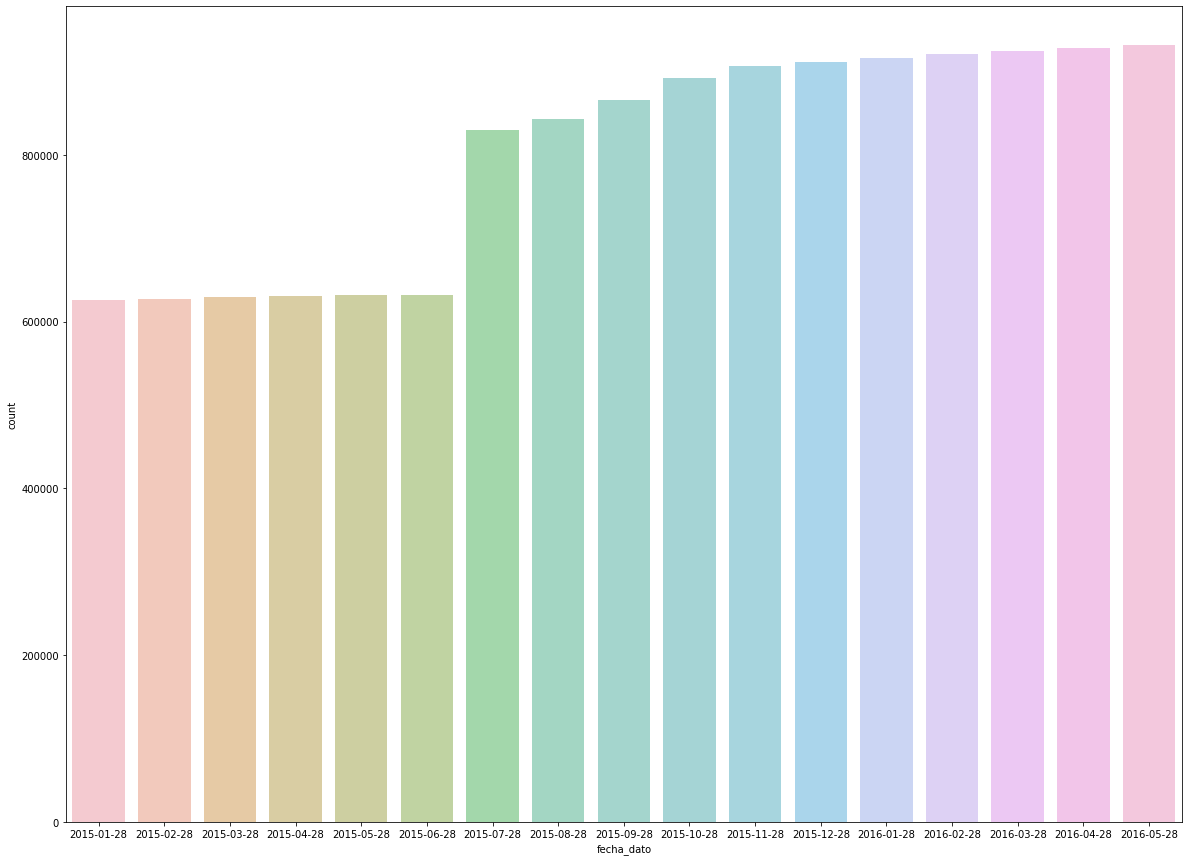

--------------------------------------------------
col :  ind_empleado


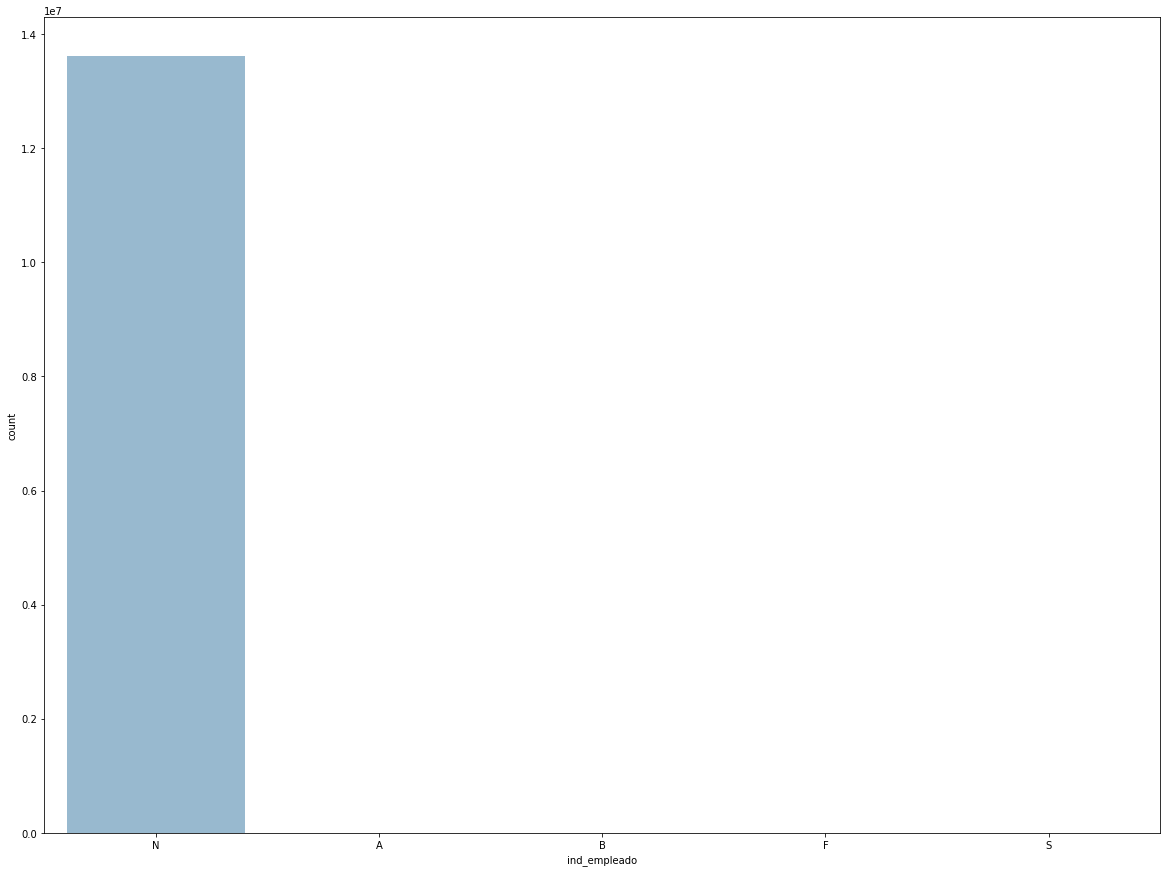

--------------------------------------------------
col :  pais_residencia


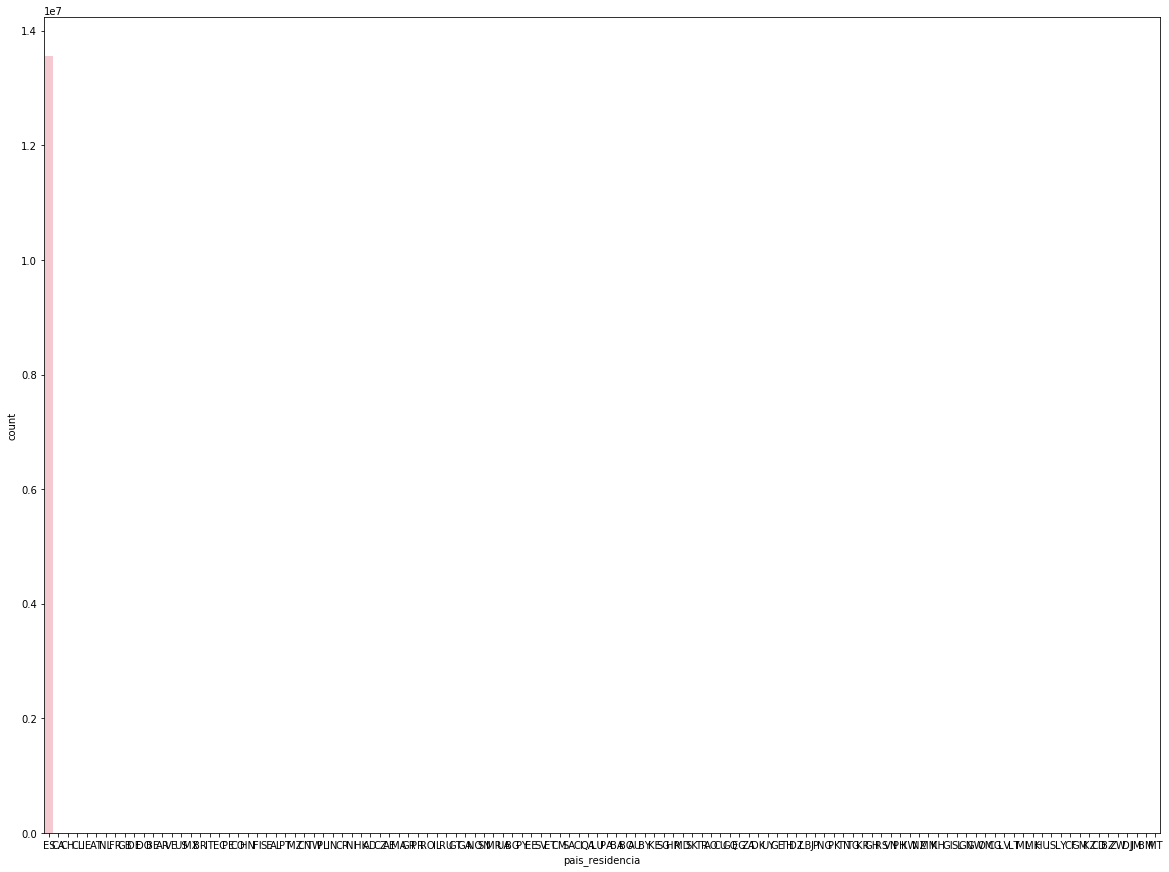

--------------------------------------------------
col :  sexo


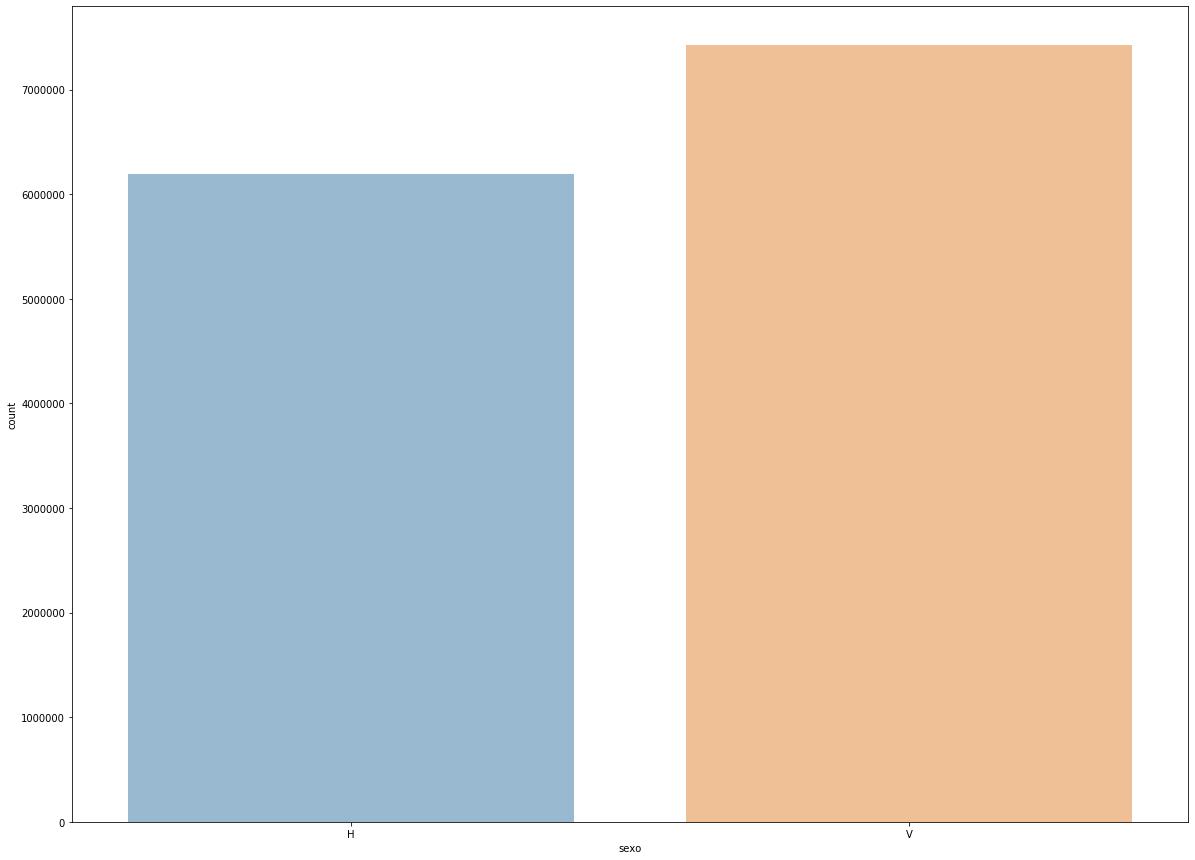

--------------------------------------------------
col :  age


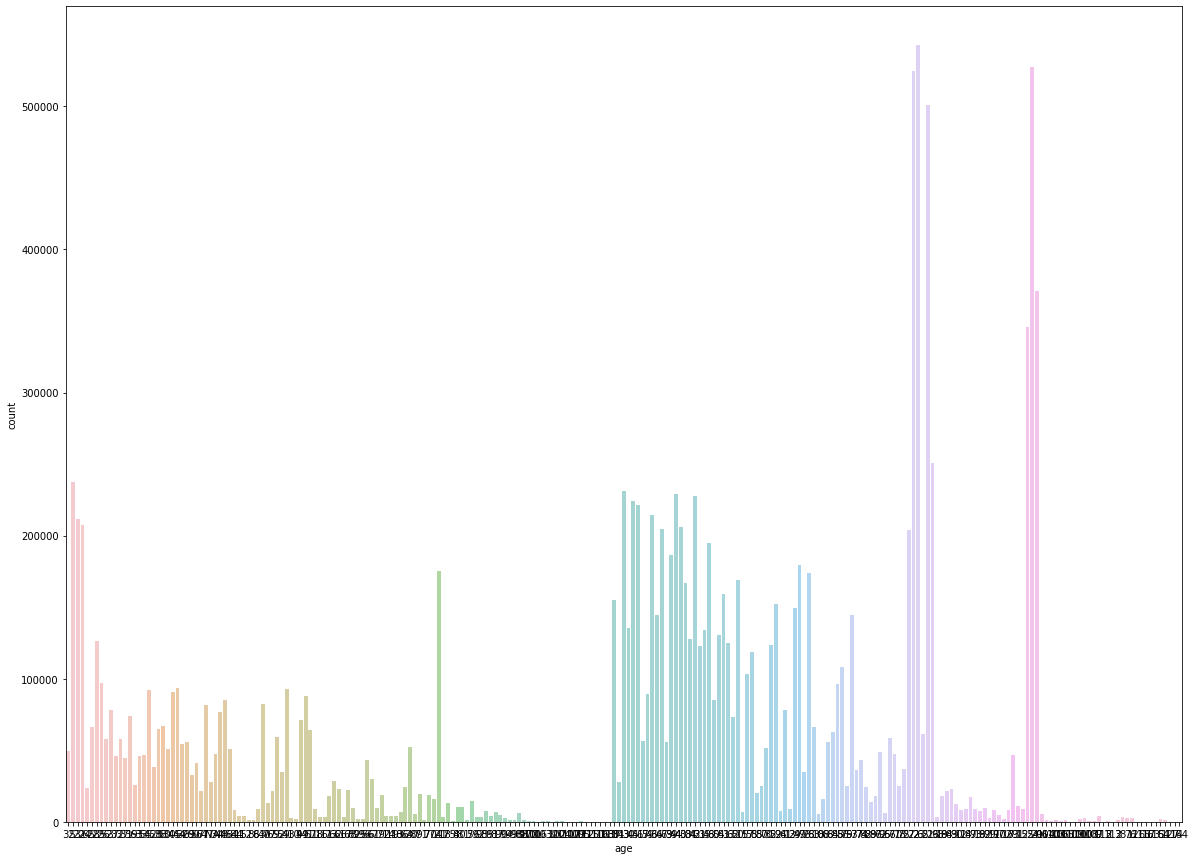

--------------------------------------------------
col :  fecha_alta


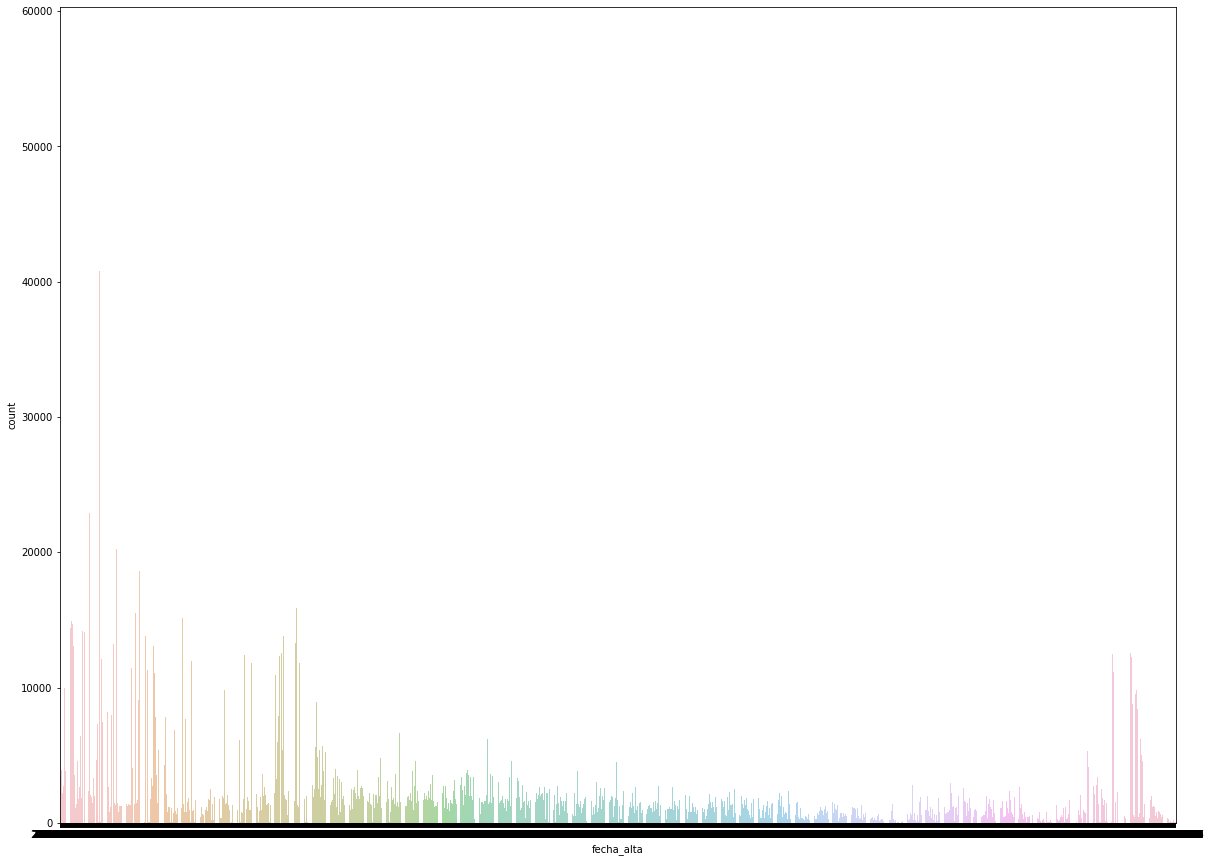

--------------------------------------------------
col :  ind_nuevo


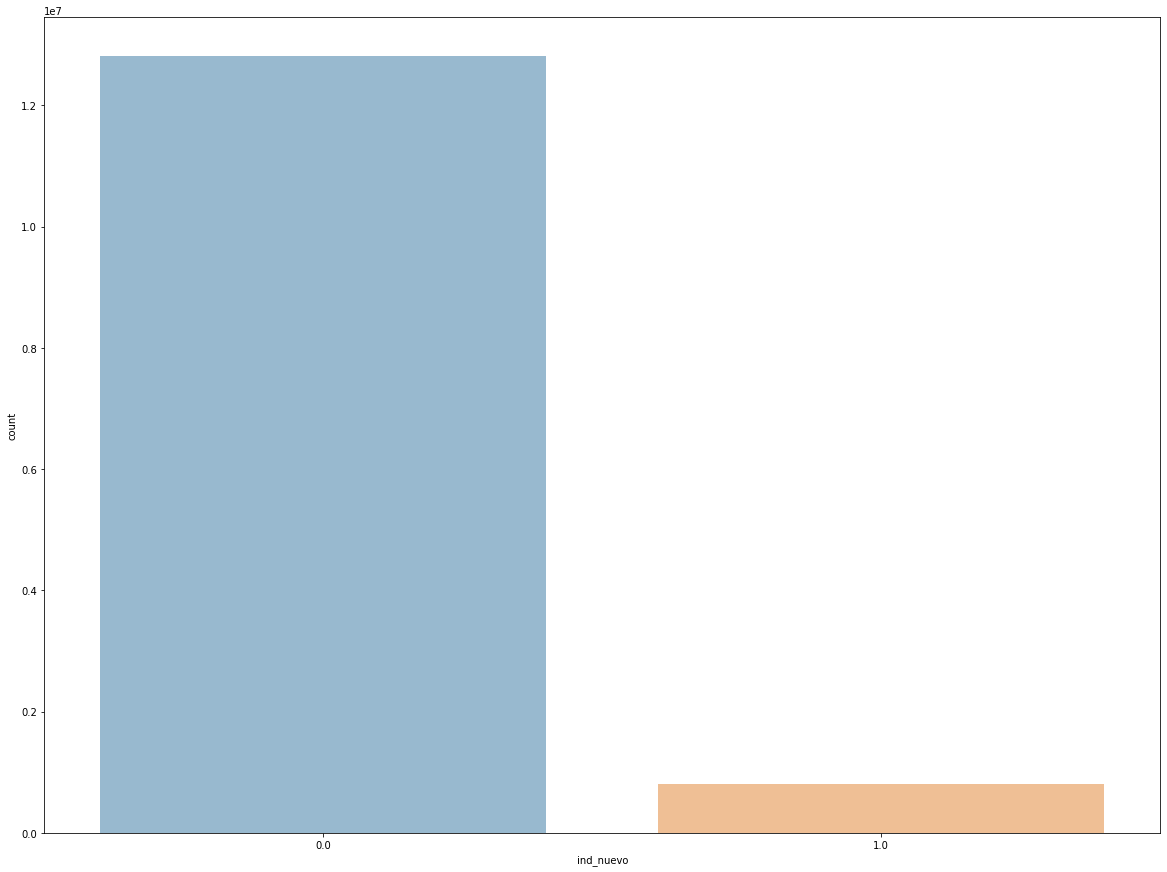

--------------------------------------------------
col :  antiguedad


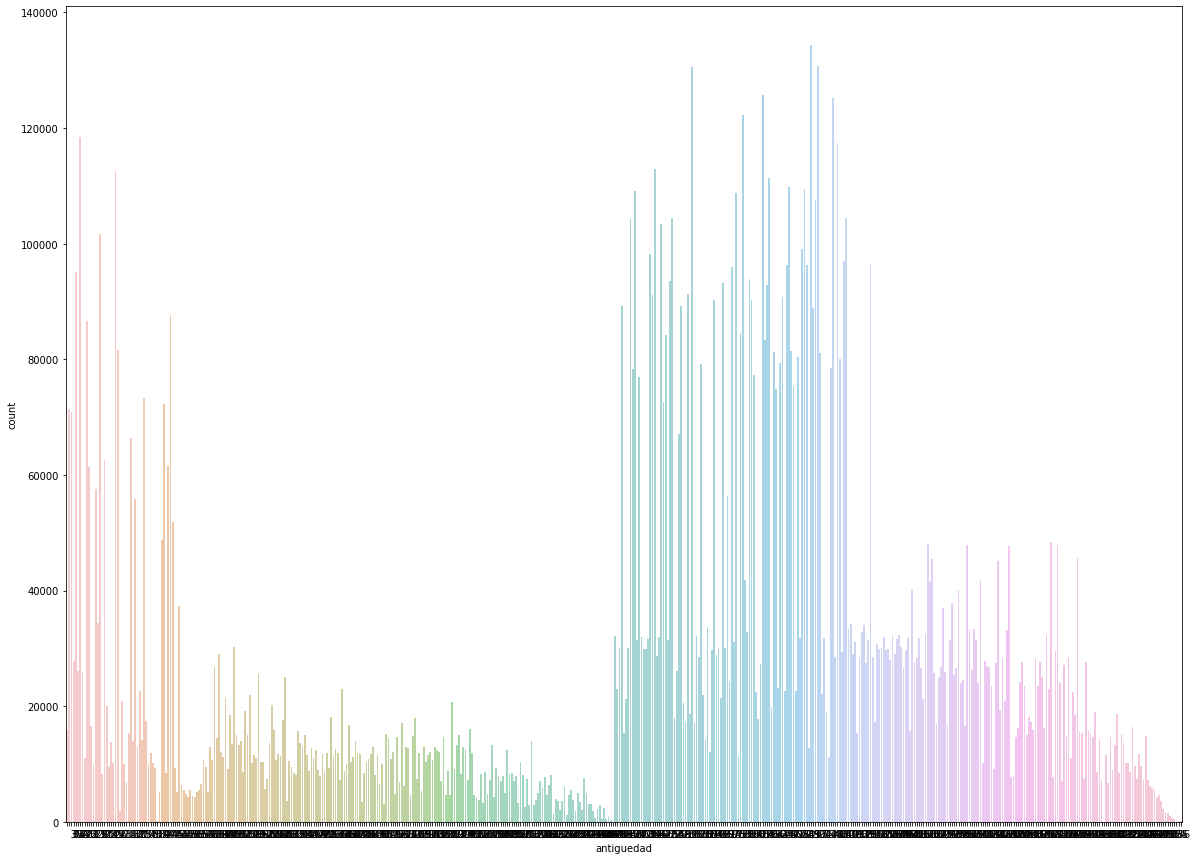

--------------------------------------------------
col :  indrel


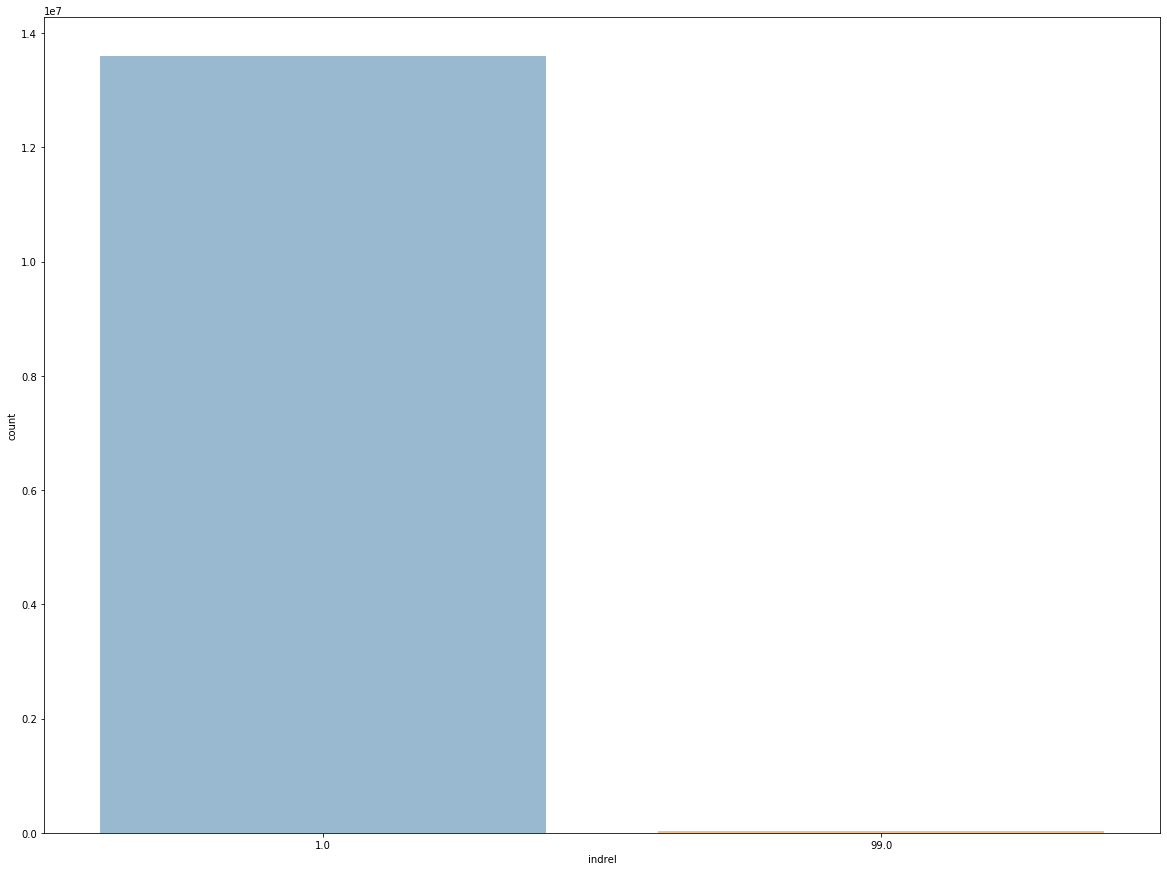

--------------------------------------------------
col :  ult_fec_cli_1t


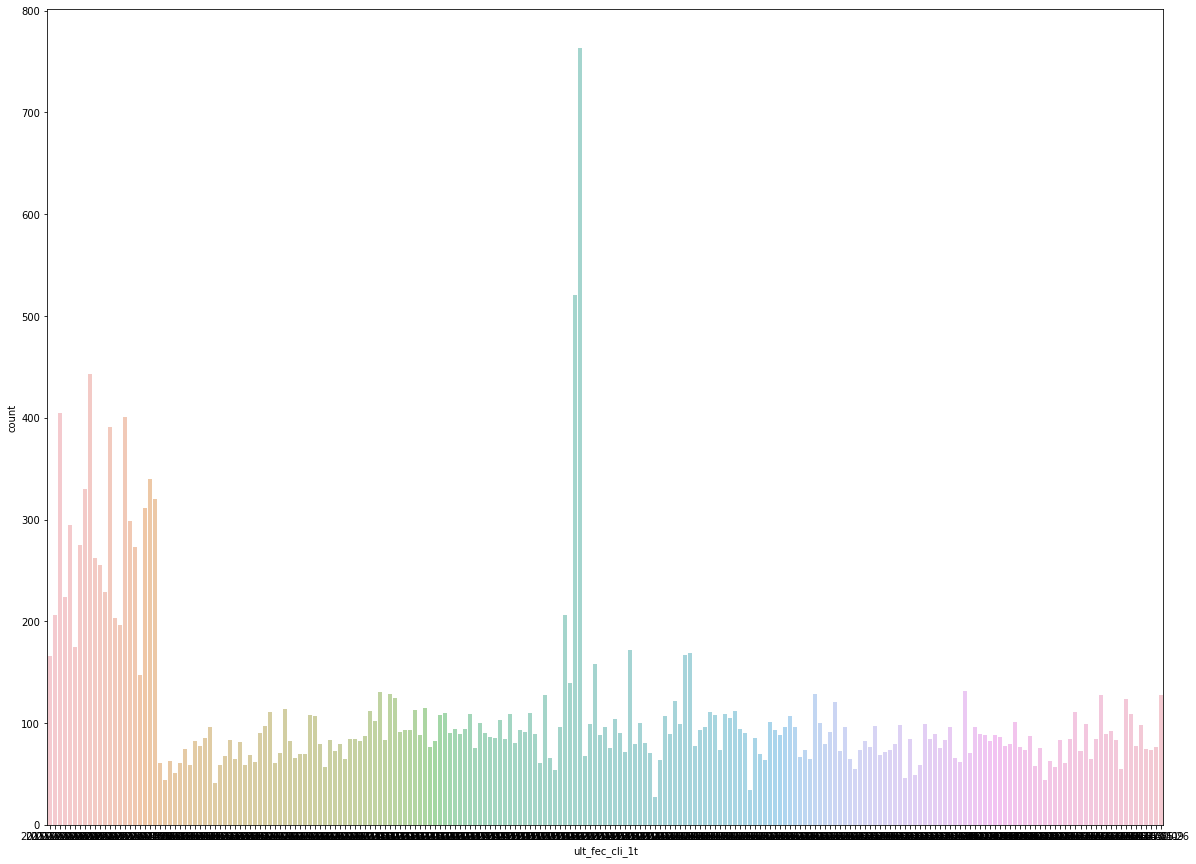

--------------------------------------------------
col :  indrel_1mes


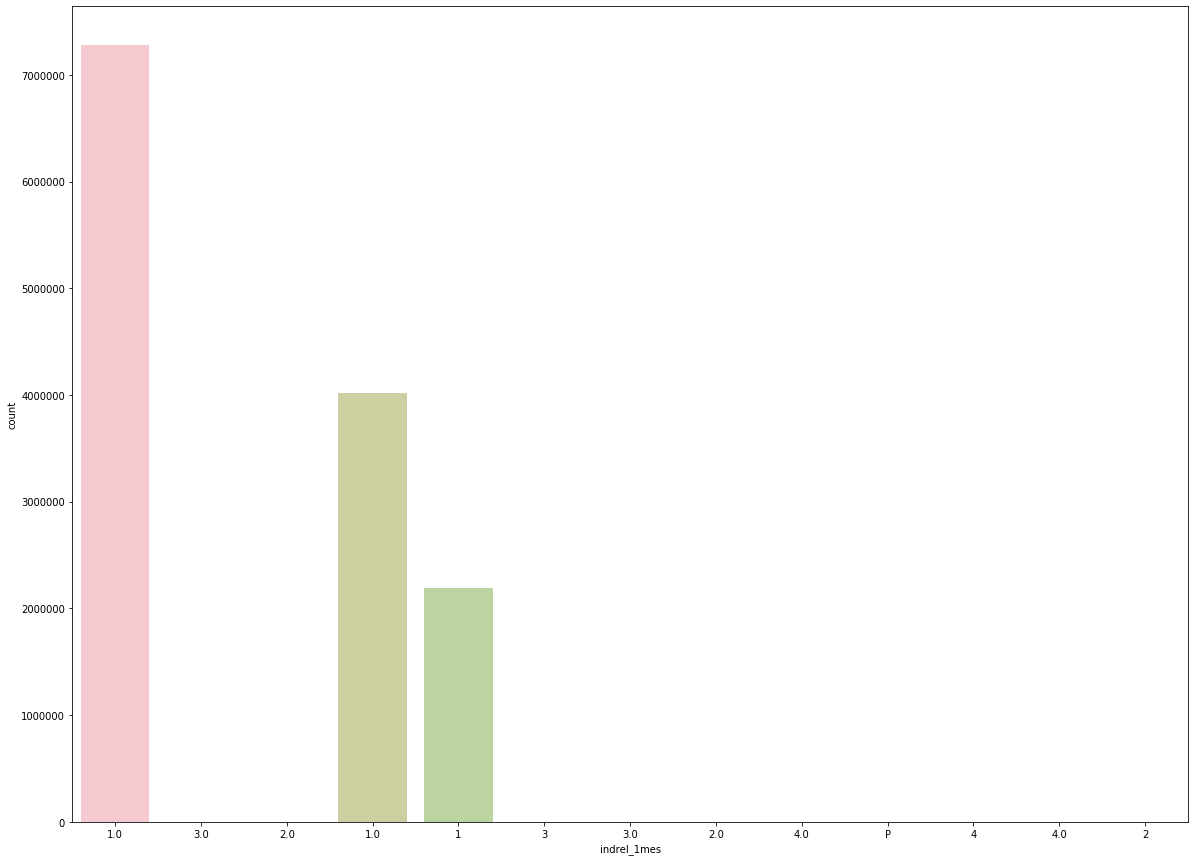

--------------------------------------------------
col :  tiprel_1mes


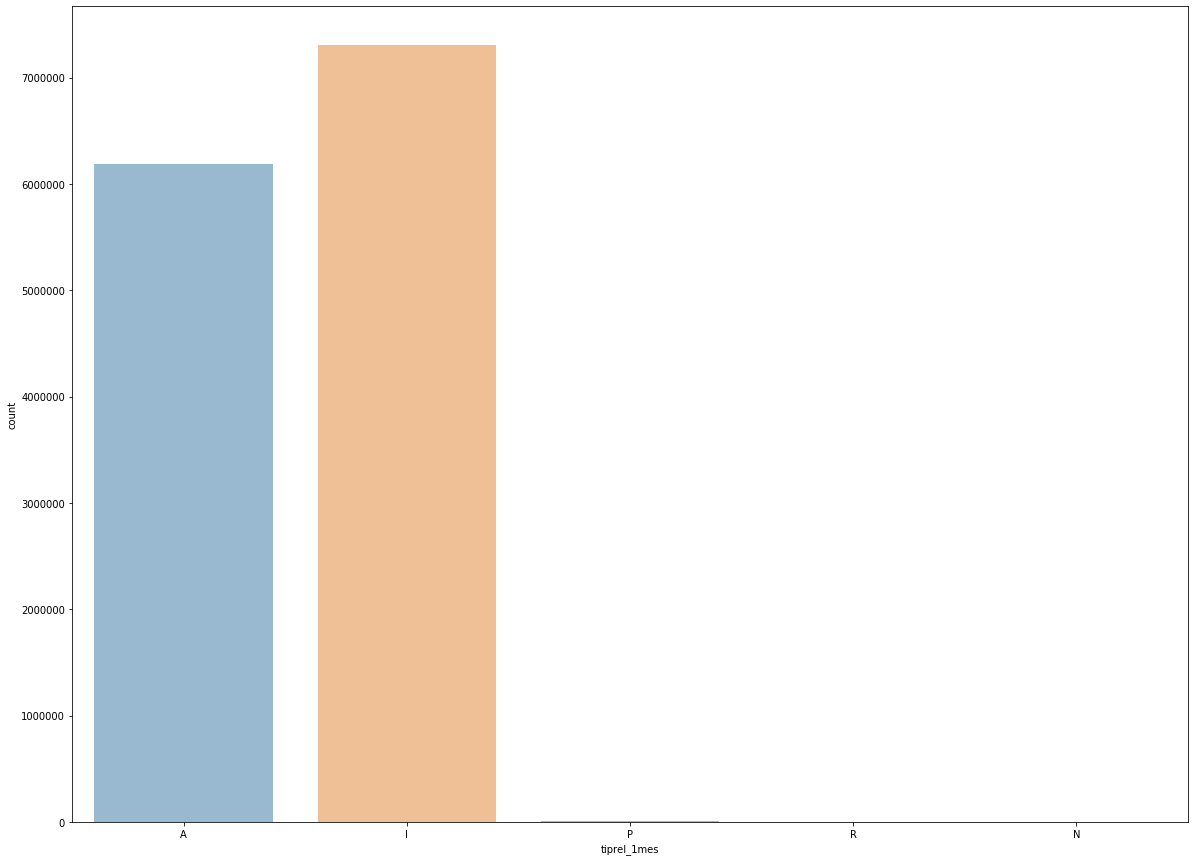

--------------------------------------------------
col :  indresi


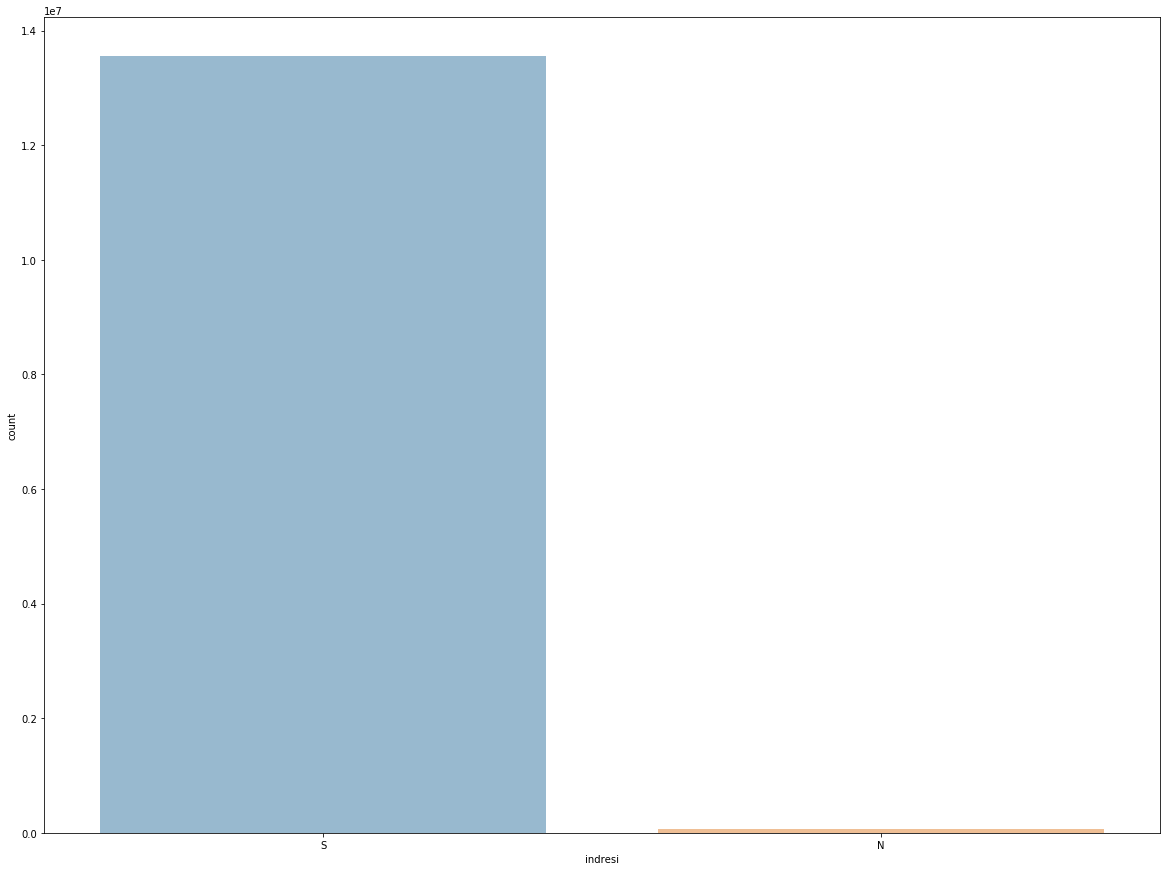

--------------------------------------------------
col :  indext


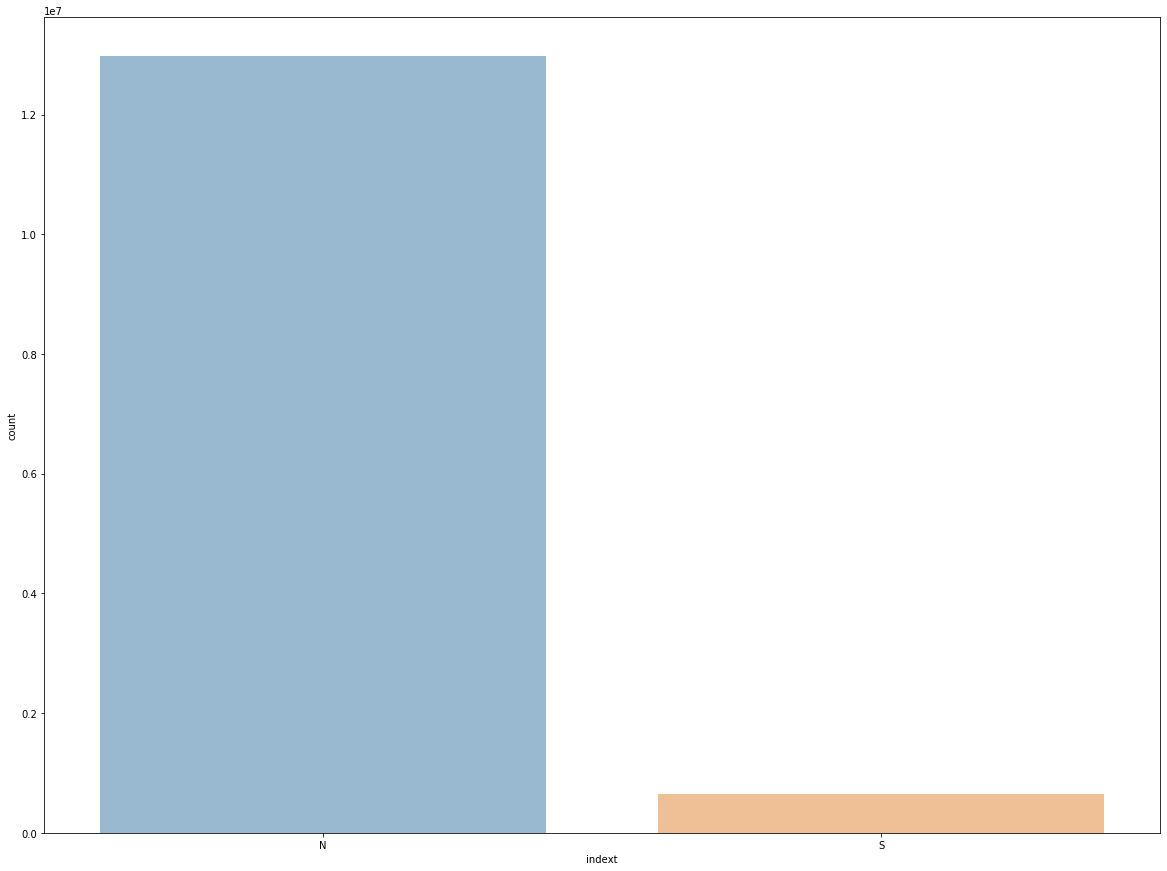

--------------------------------------------------
col :  conyuemp


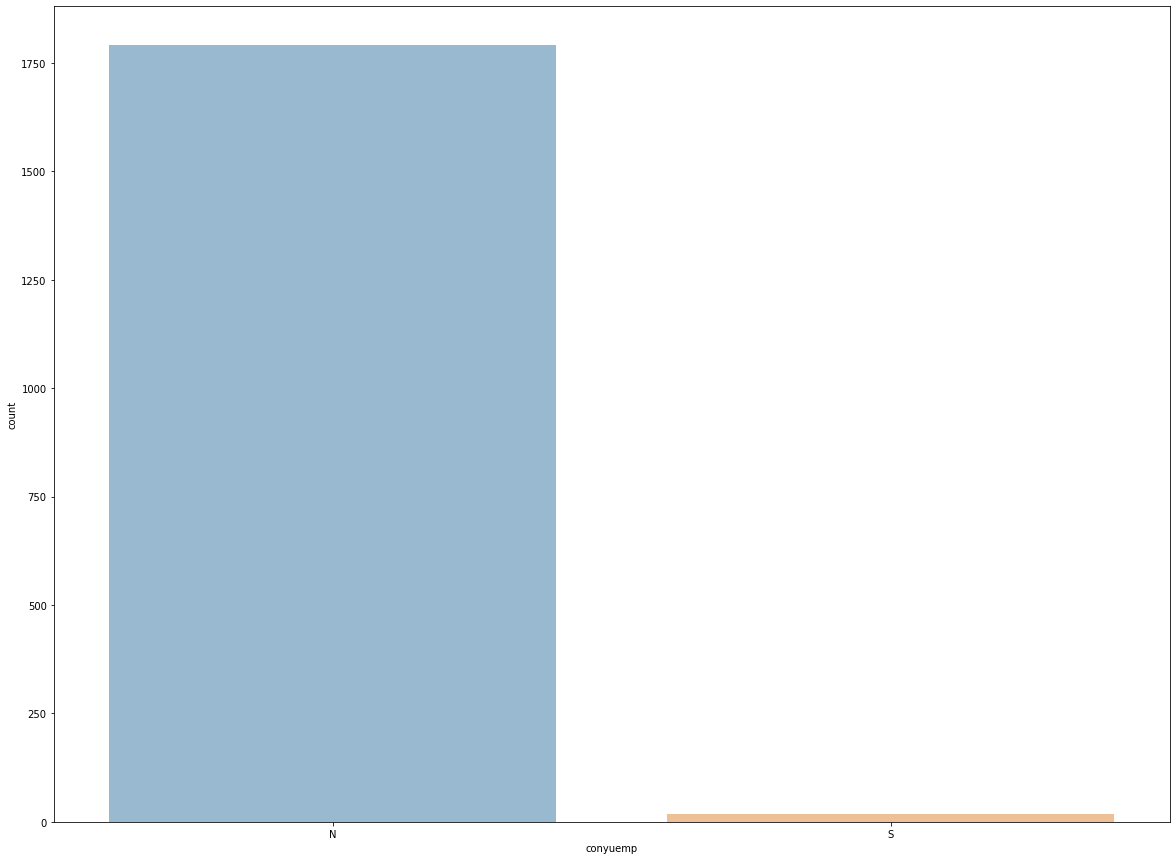

--------------------------------------------------
col :  canal_entrada


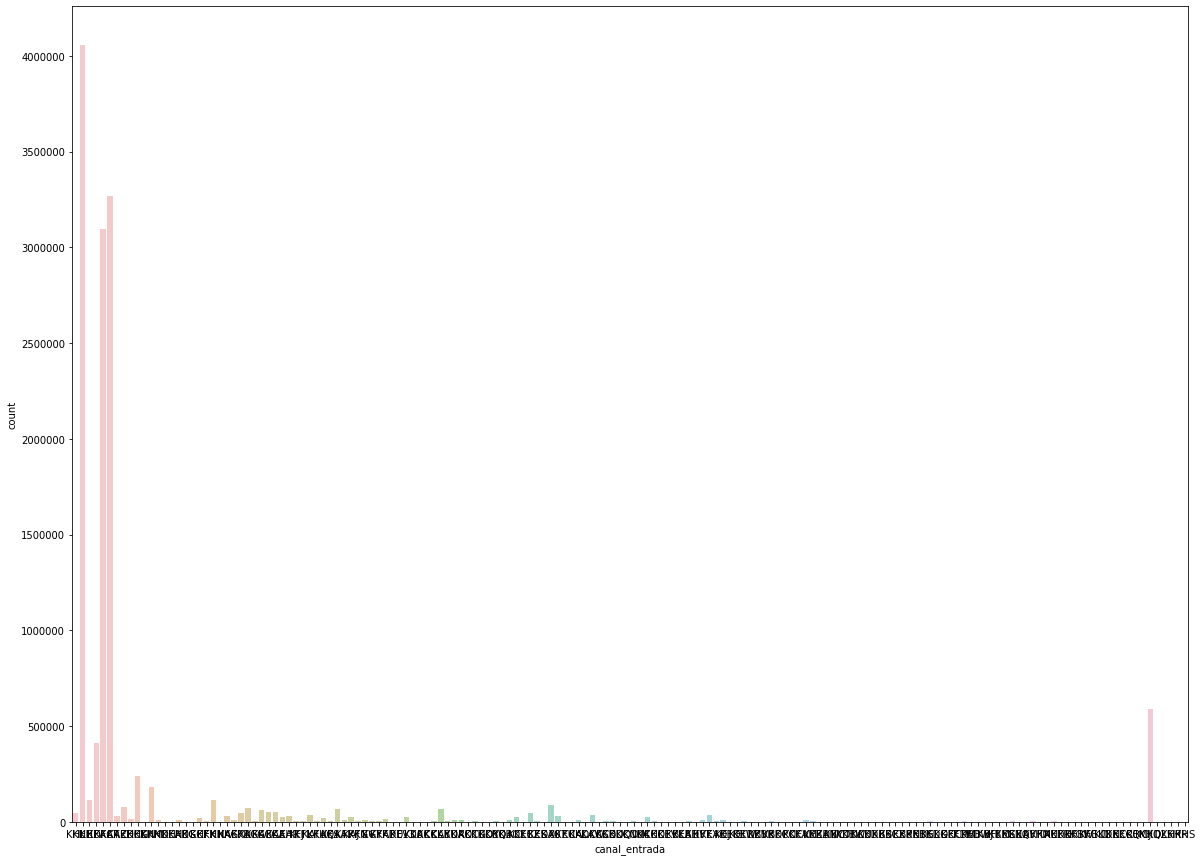

--------------------------------------------------
col :  indfall


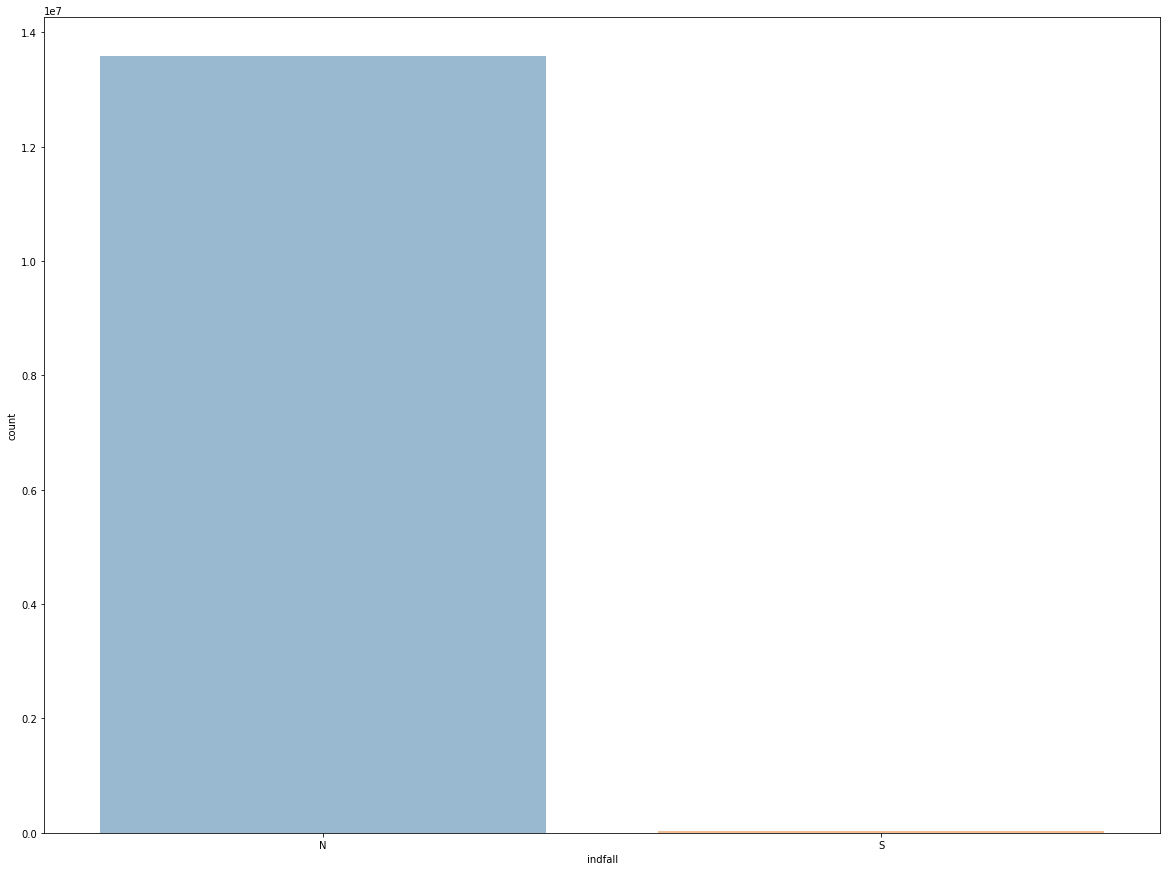

--------------------------------------------------
col :  tipodom


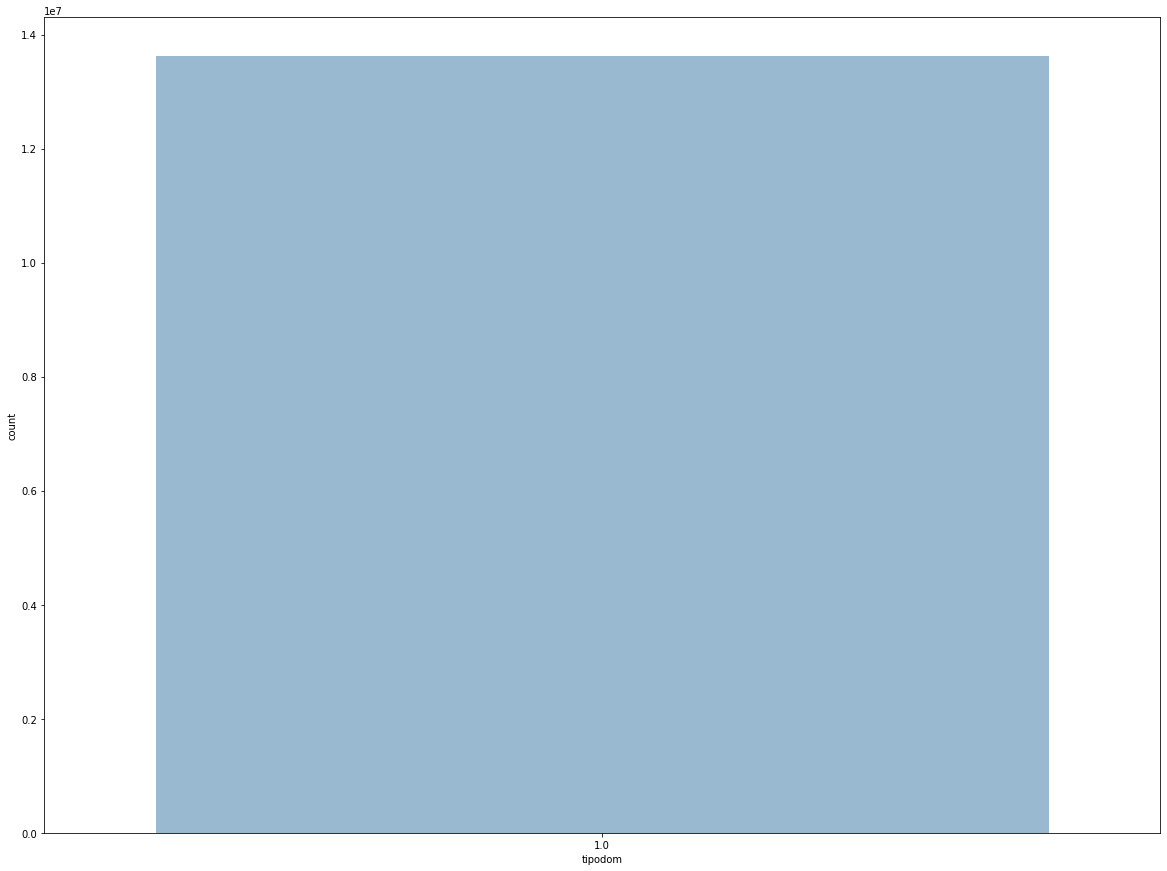

--------------------------------------------------
col :  cod_prov


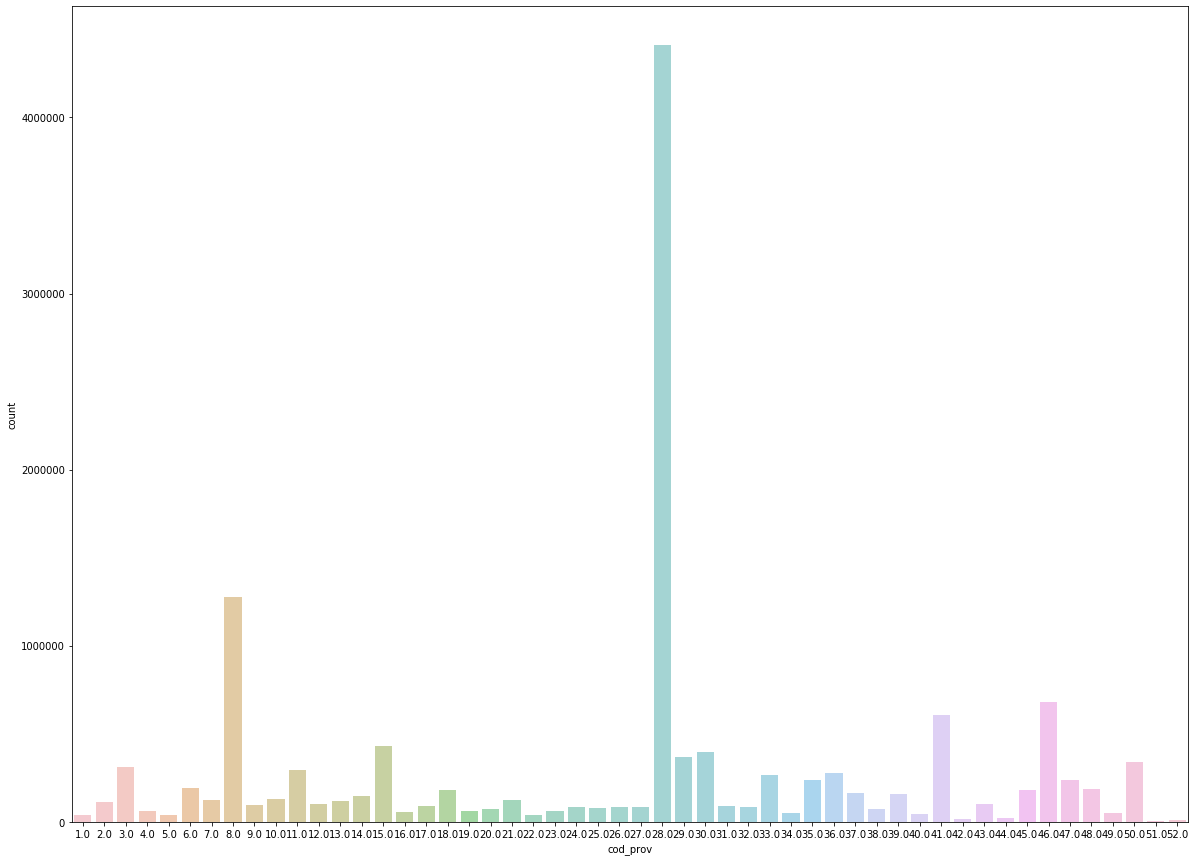

--------------------------------------------------
col :  nomprov


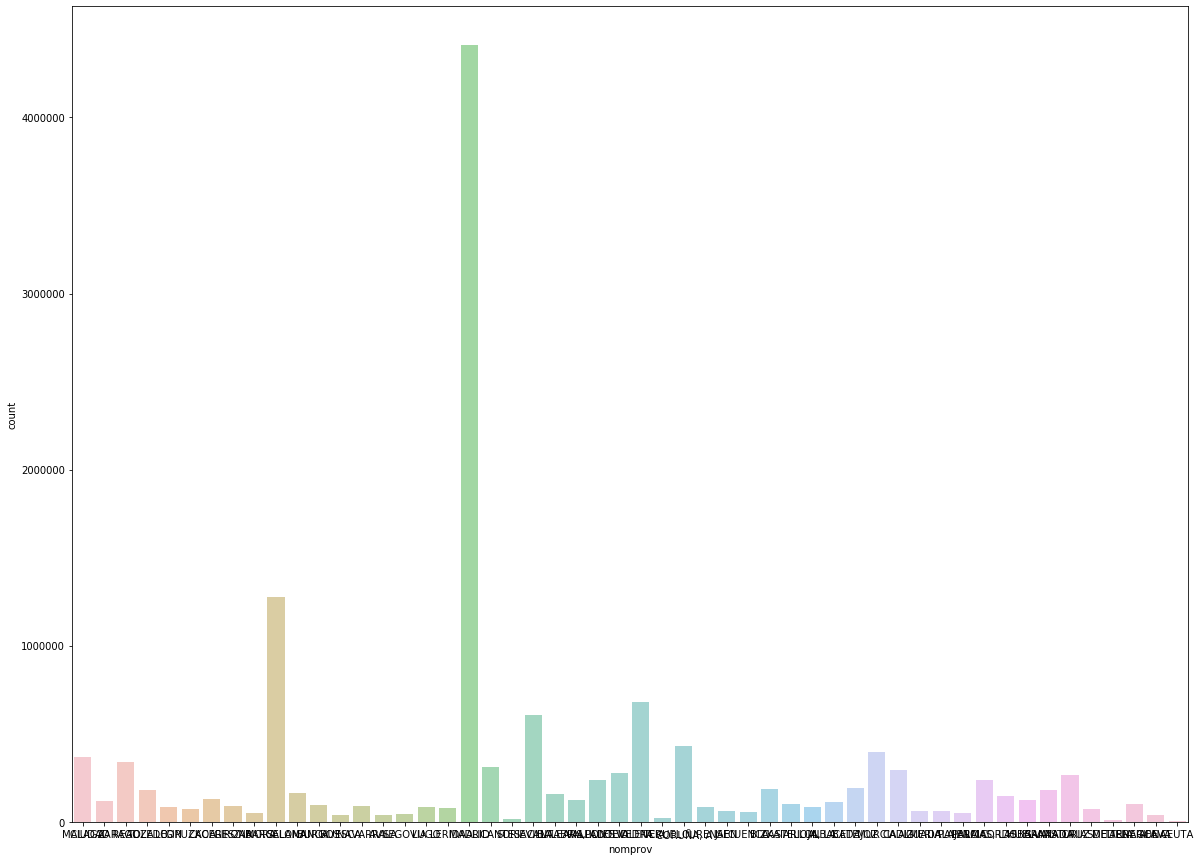

--------------------------------------------------
col :  ind_actividad_cliente


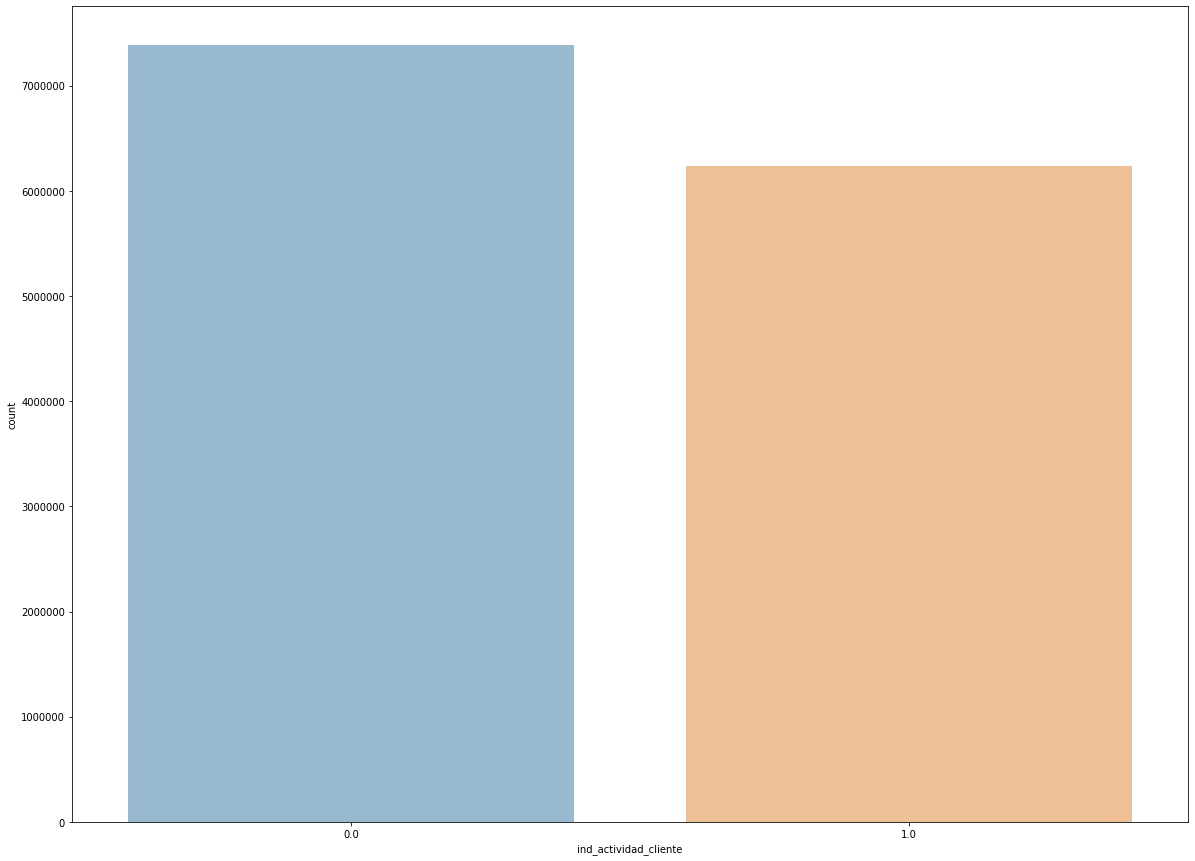

--------------------------------------------------
col :  segmento


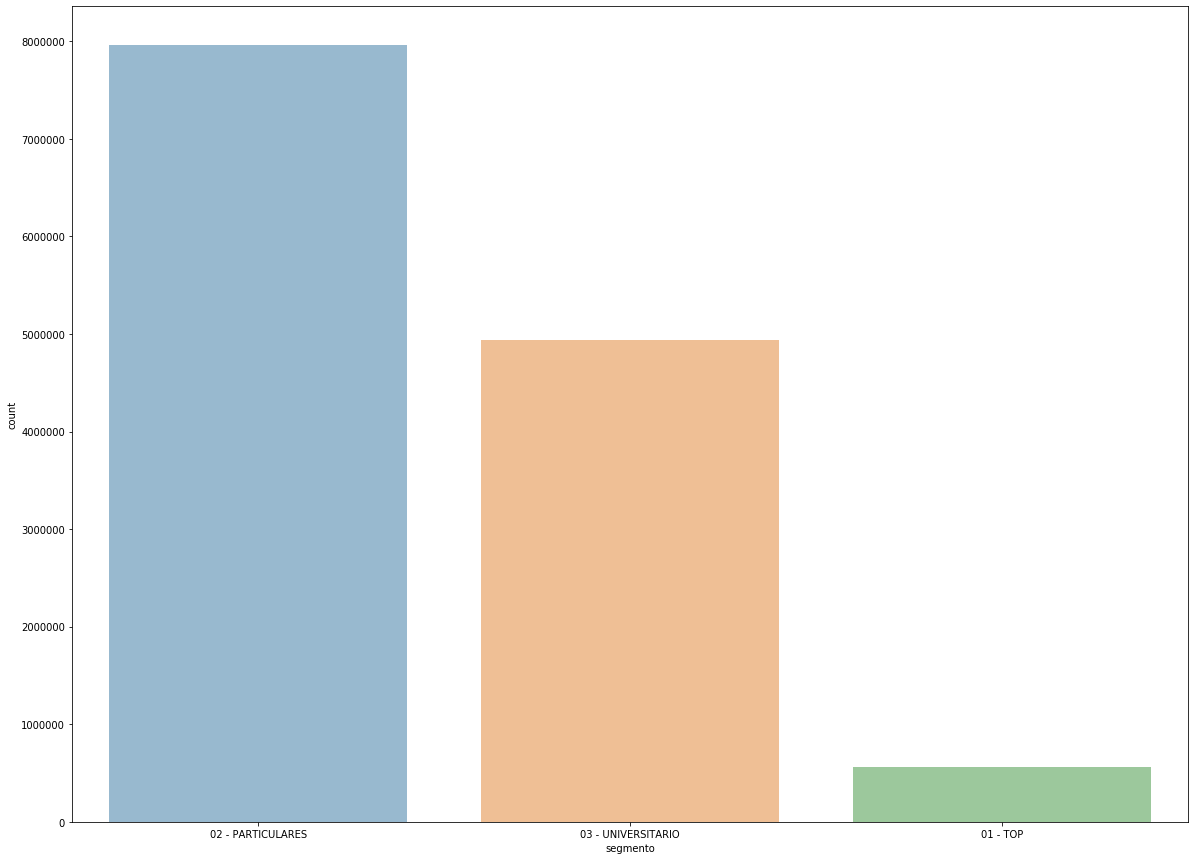

--------------------------------------------------
col :  ind_ahor_fin_ult1


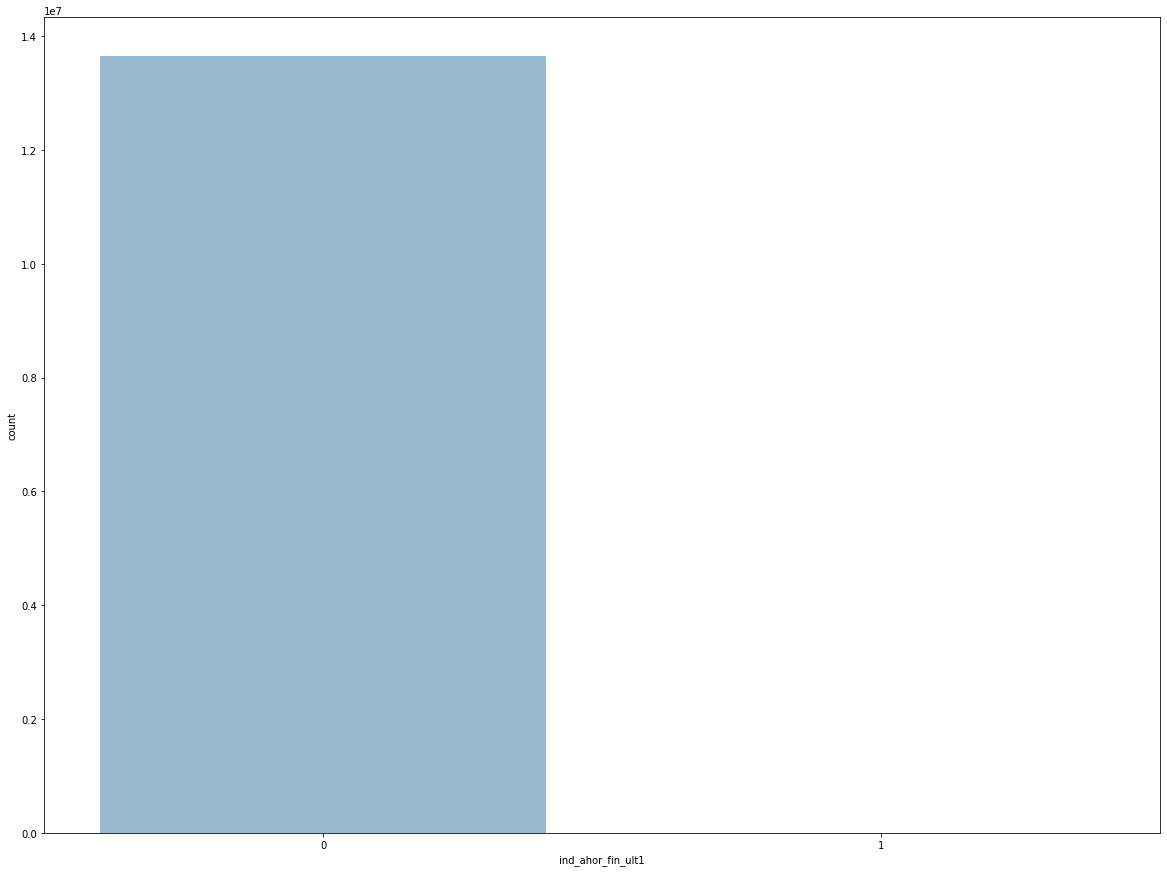

--------------------------------------------------
col :  ind_aval_fin_ult1


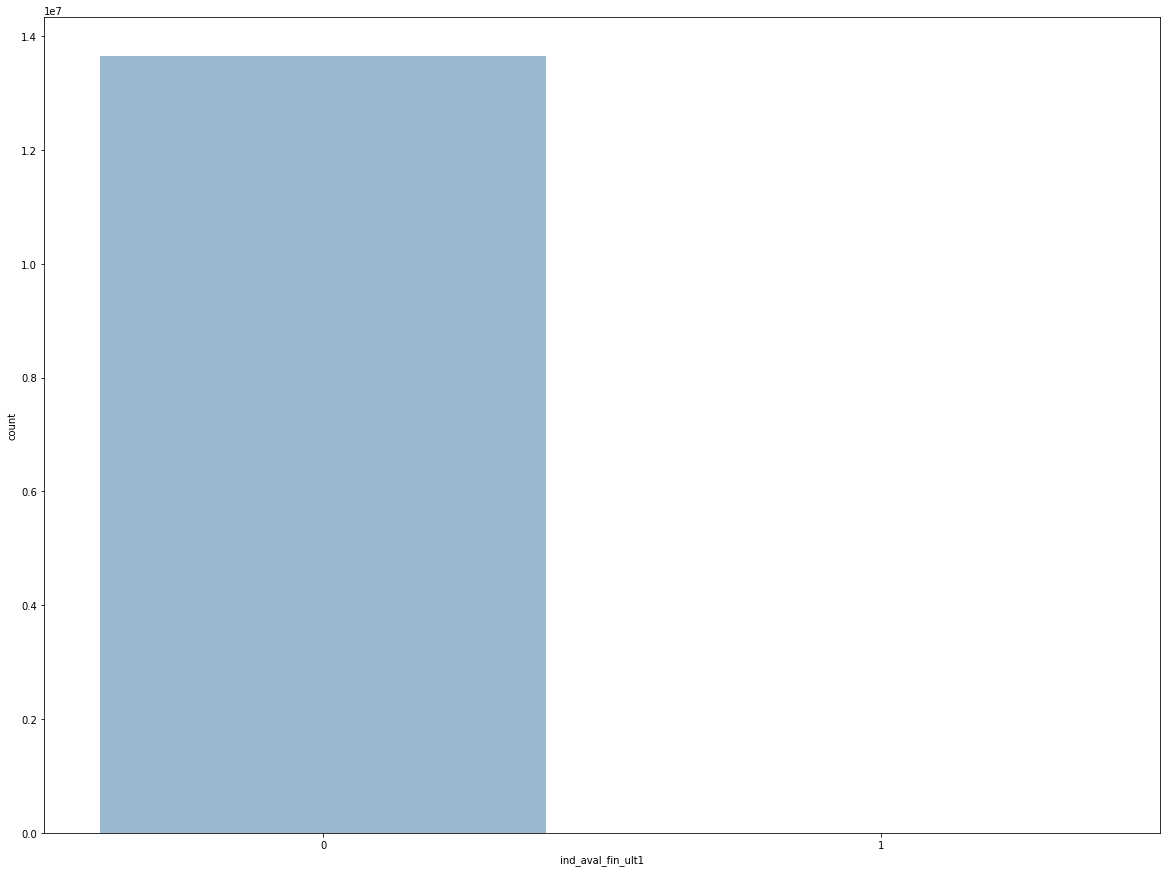

--------------------------------------------------
col :  ind_cco_fin_ult1


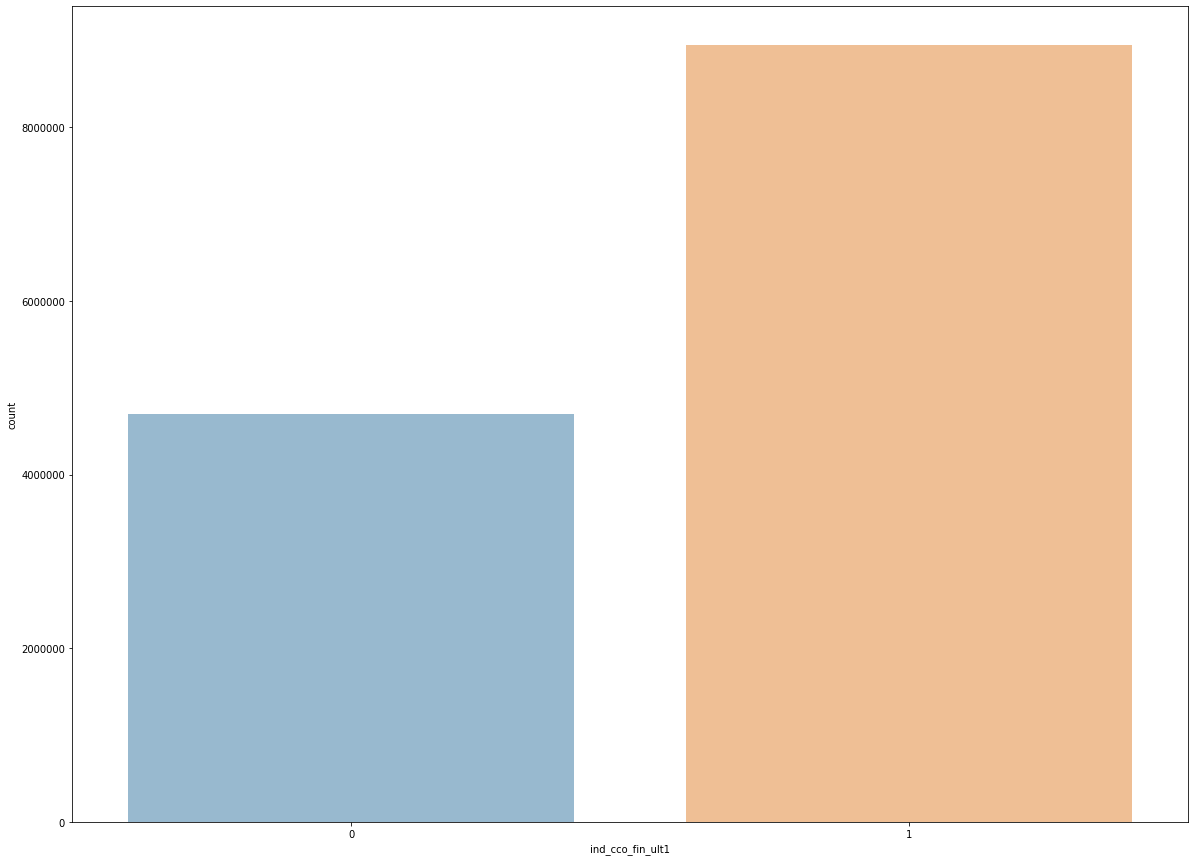

--------------------------------------------------
col :  ind_cder_fin_ult1


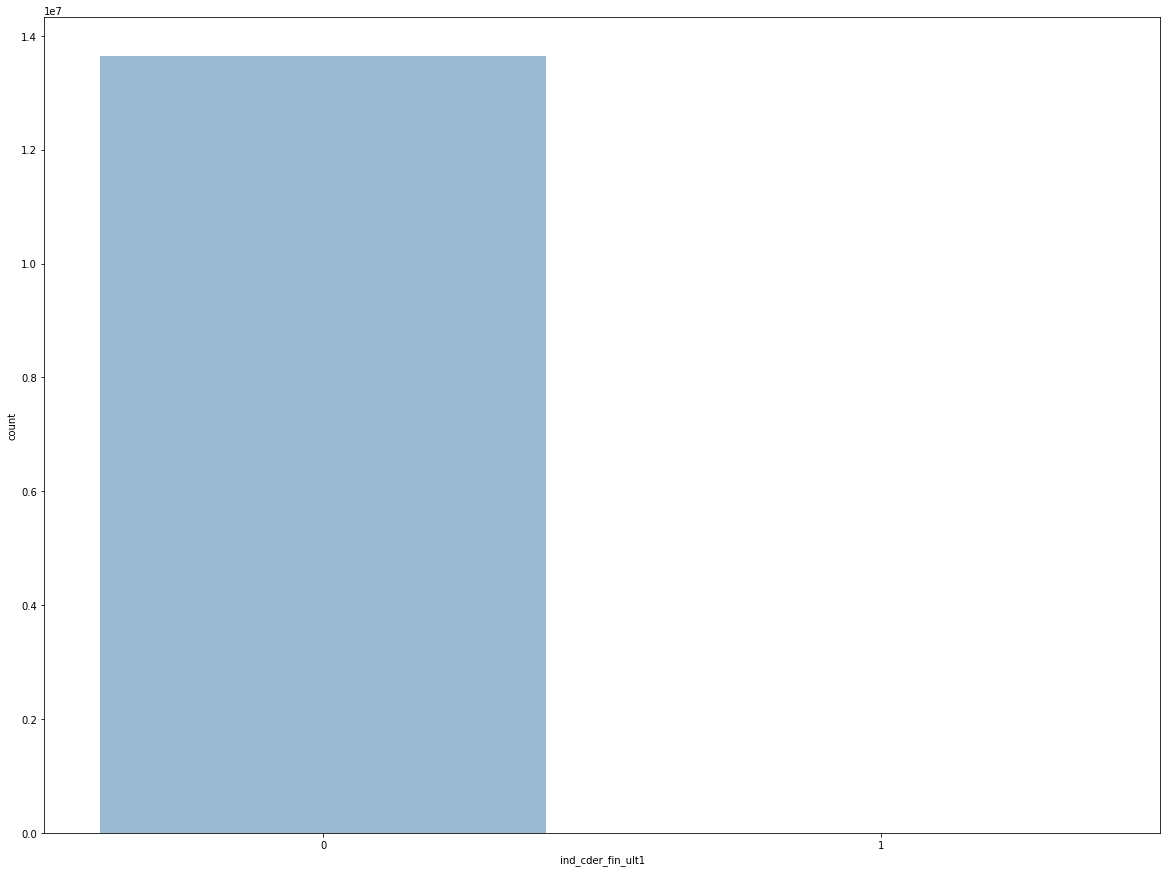

--------------------------------------------------
col :  ind_cno_fin_ult1


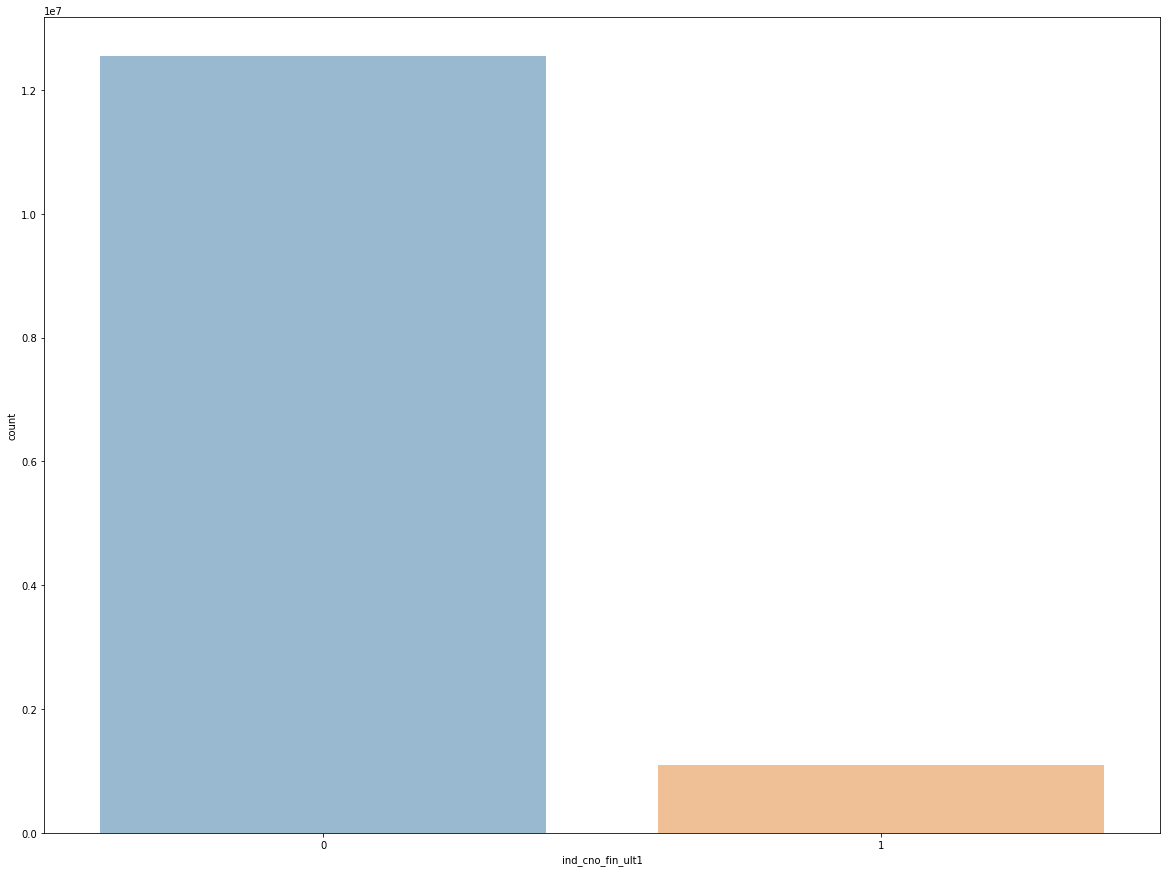

--------------------------------------------------
col :  ind_ctju_fin_ult1


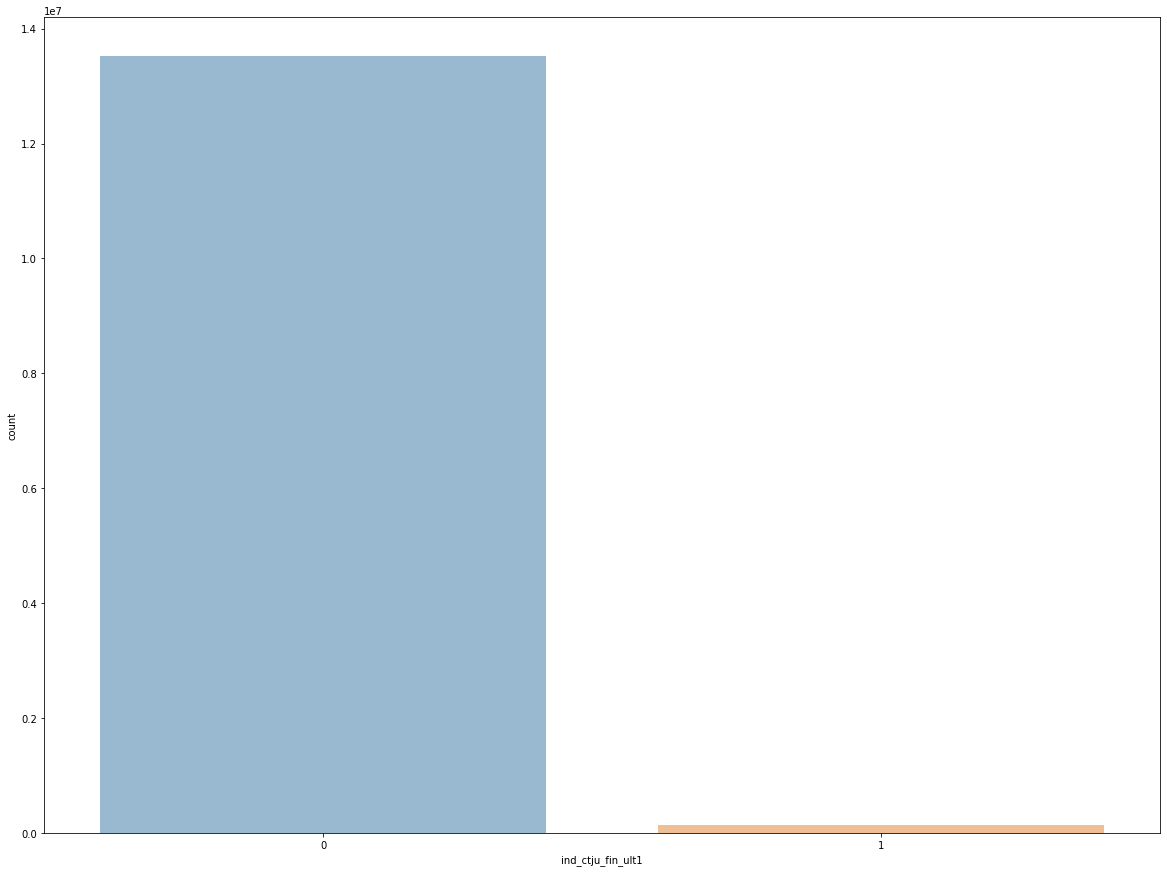

--------------------------------------------------
col :  ind_ctma_fin_ult1


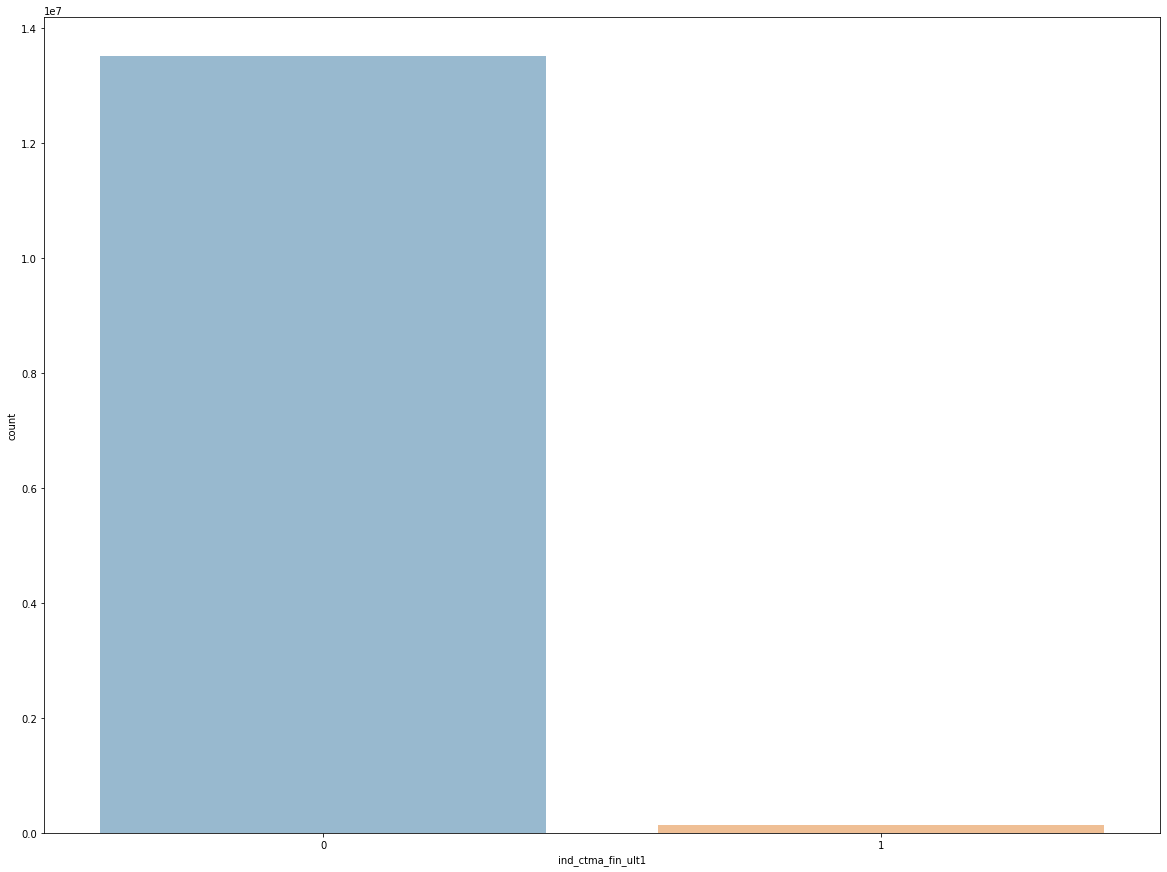

--------------------------------------------------
col :  ind_ctop_fin_ult1


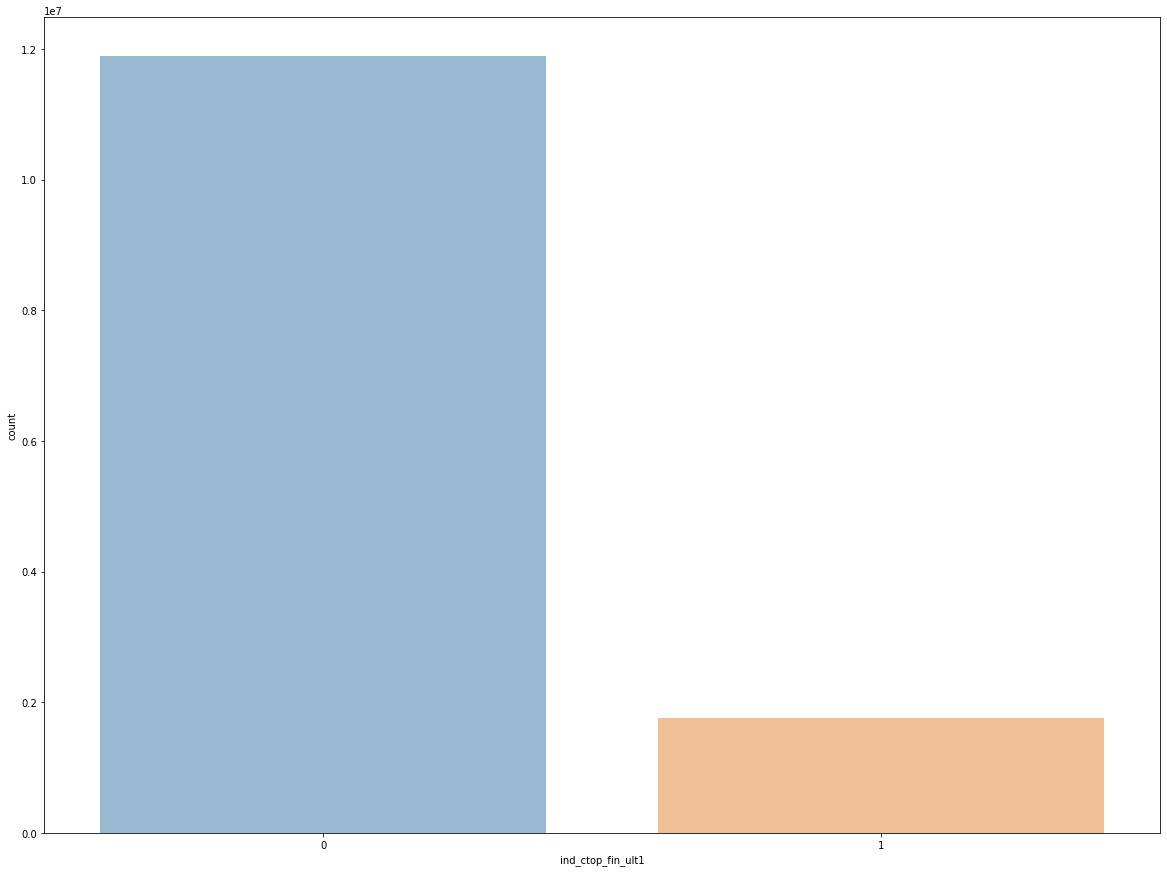

--------------------------------------------------
col :  ind_ctpp_fin_ult1


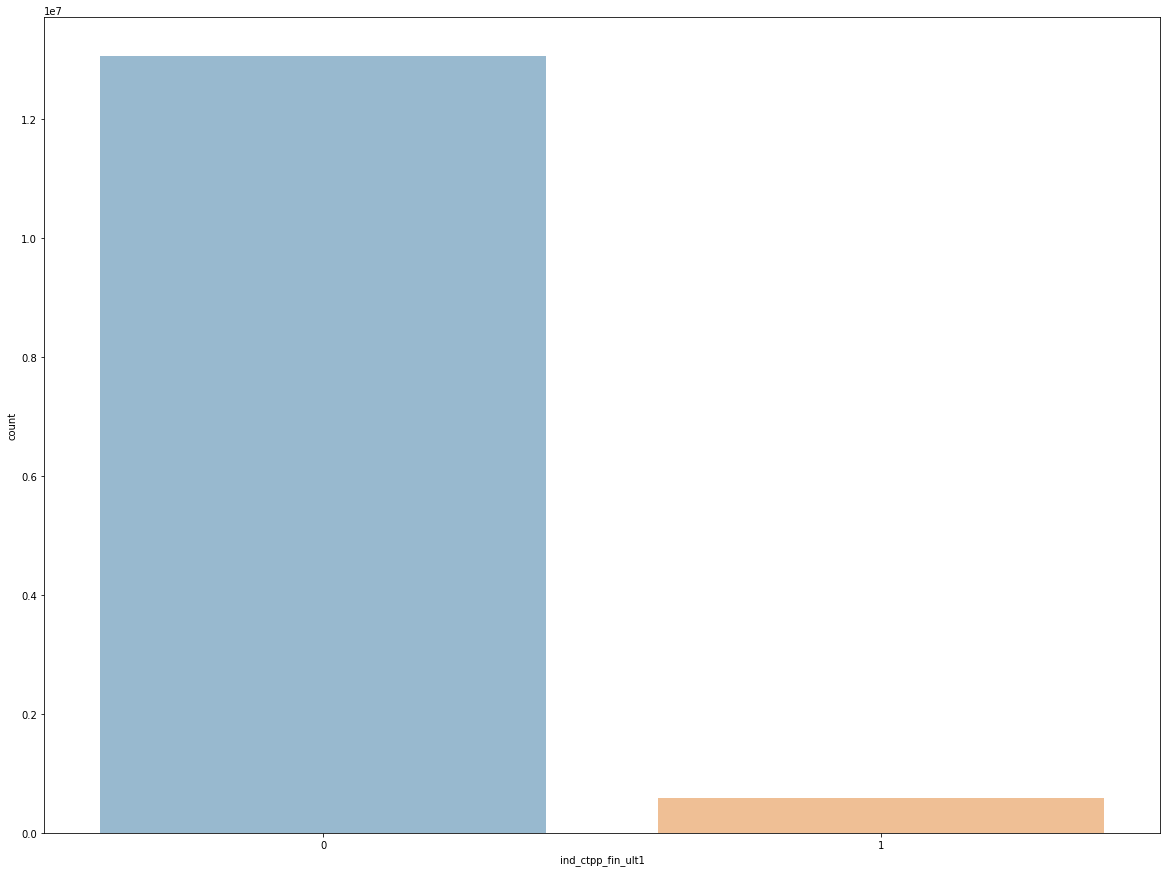

--------------------------------------------------
col :  ind_deco_fin_ult1


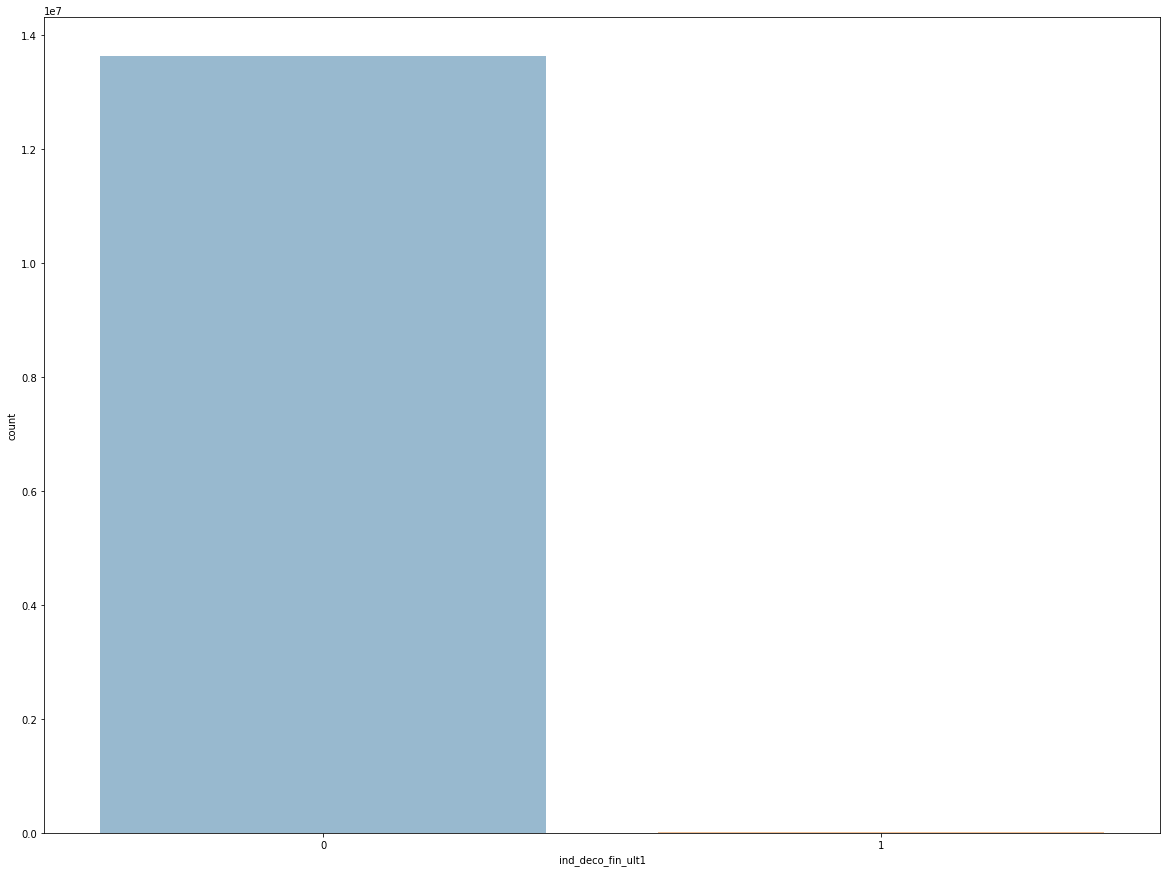

--------------------------------------------------
col :  ind_deme_fin_ult1


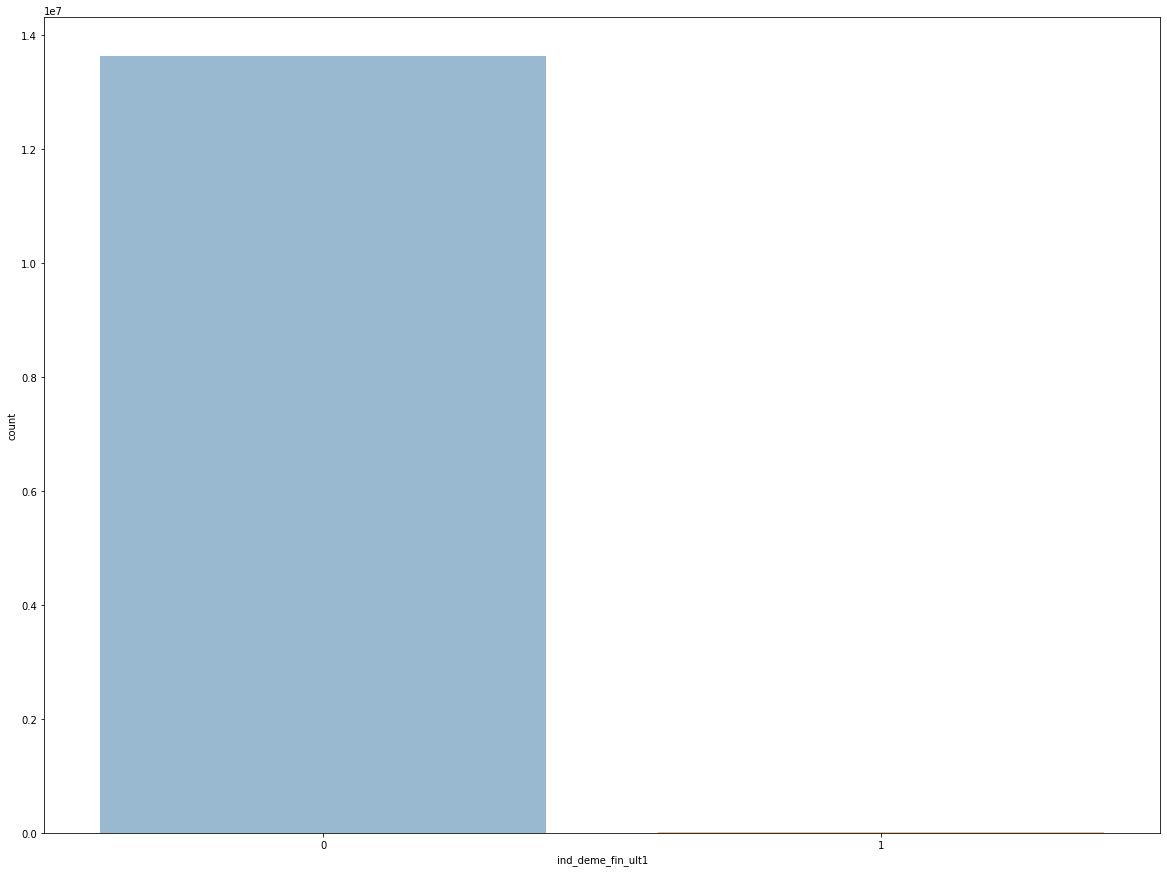

--------------------------------------------------
col :  ind_dela_fin_ult1


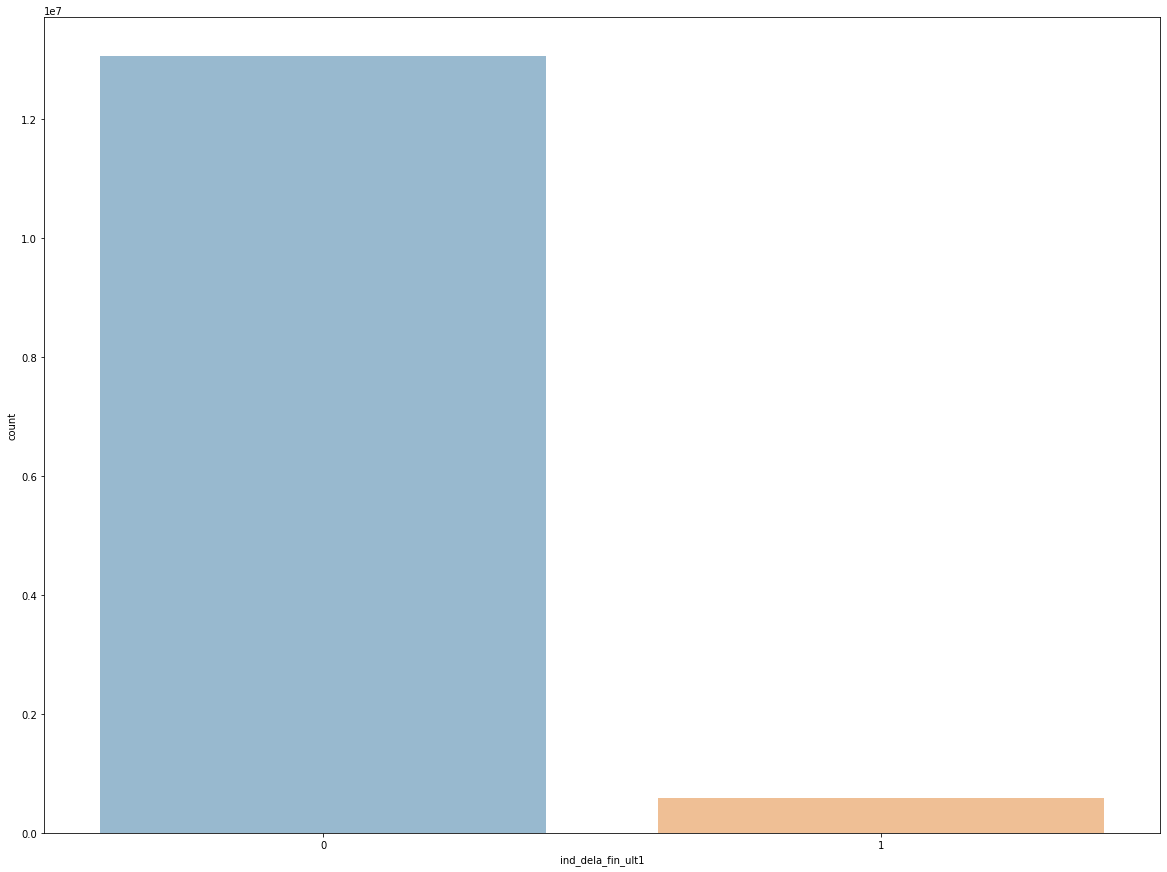

--------------------------------------------------
col :  ind_ecue_fin_ult1


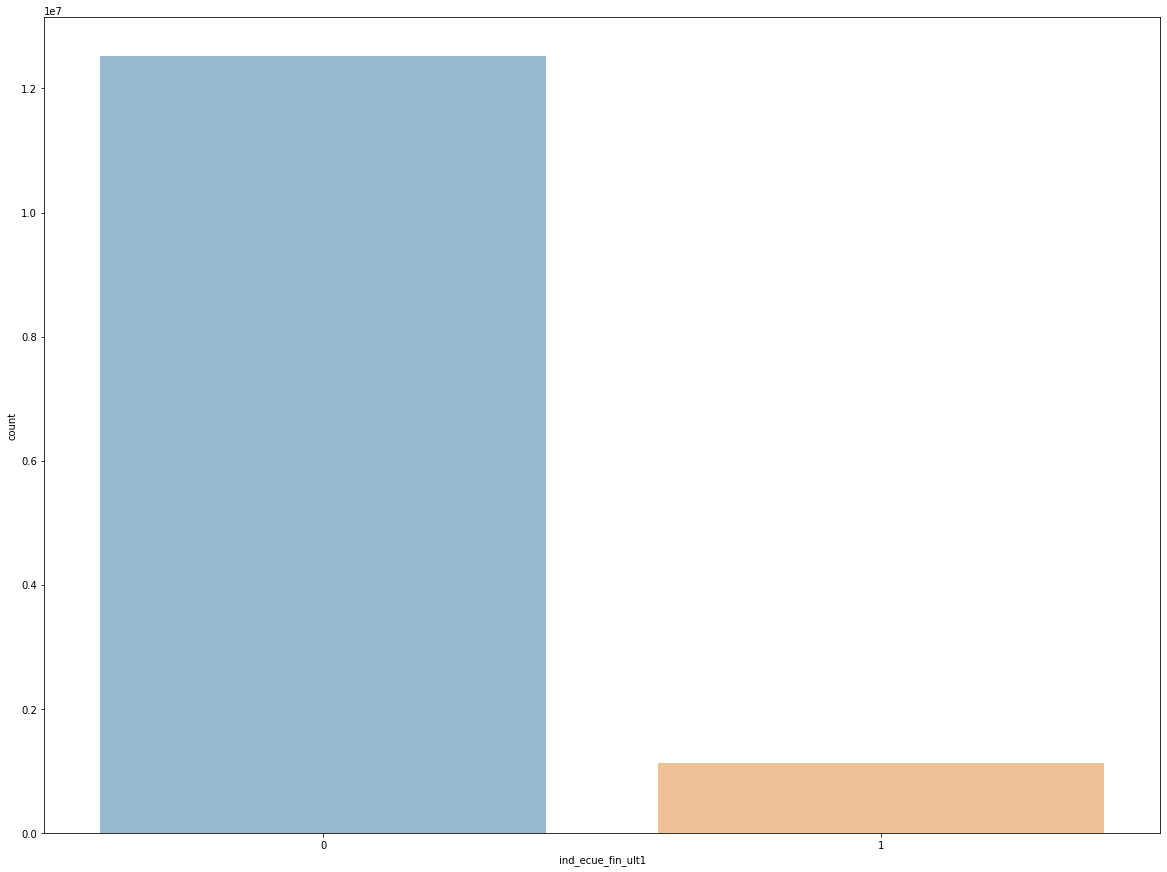

--------------------------------------------------
col :  ind_fond_fin_ult1


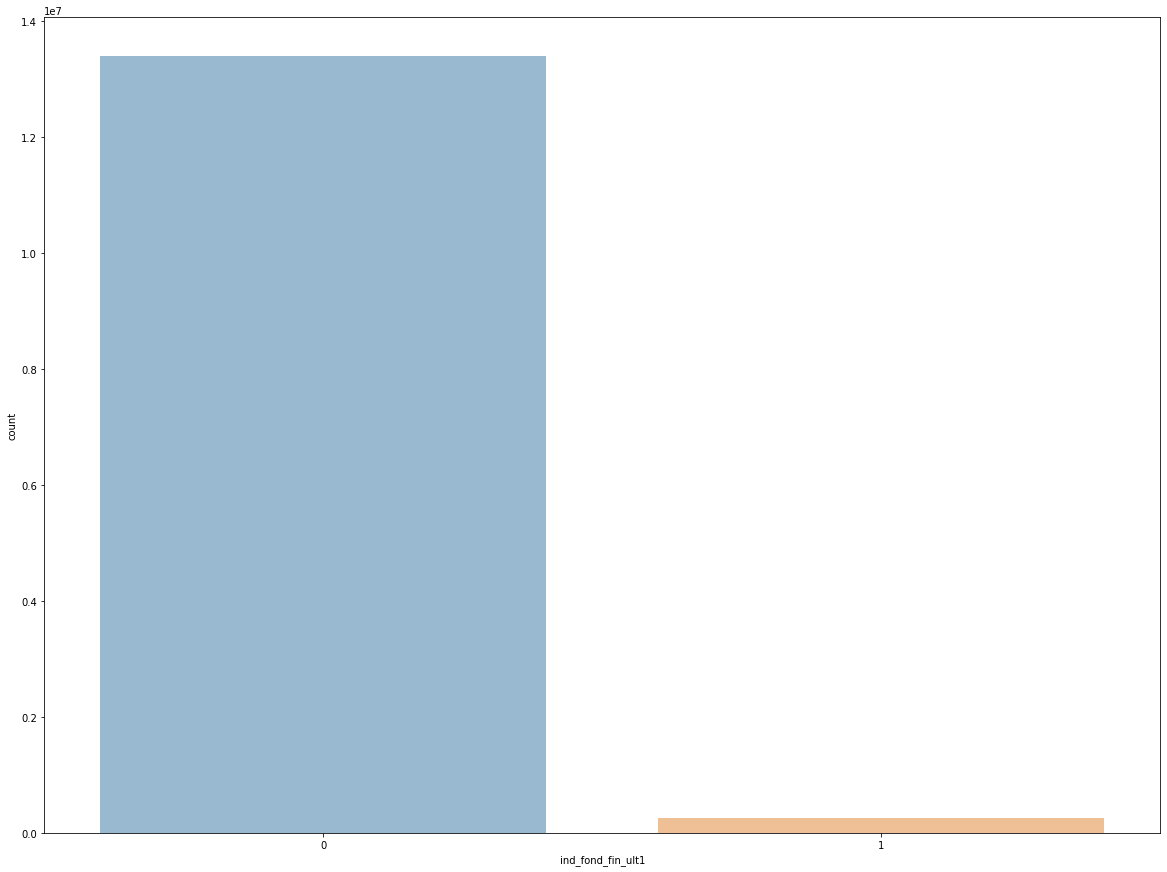

--------------------------------------------------
col :  ind_hip_fin_ult1


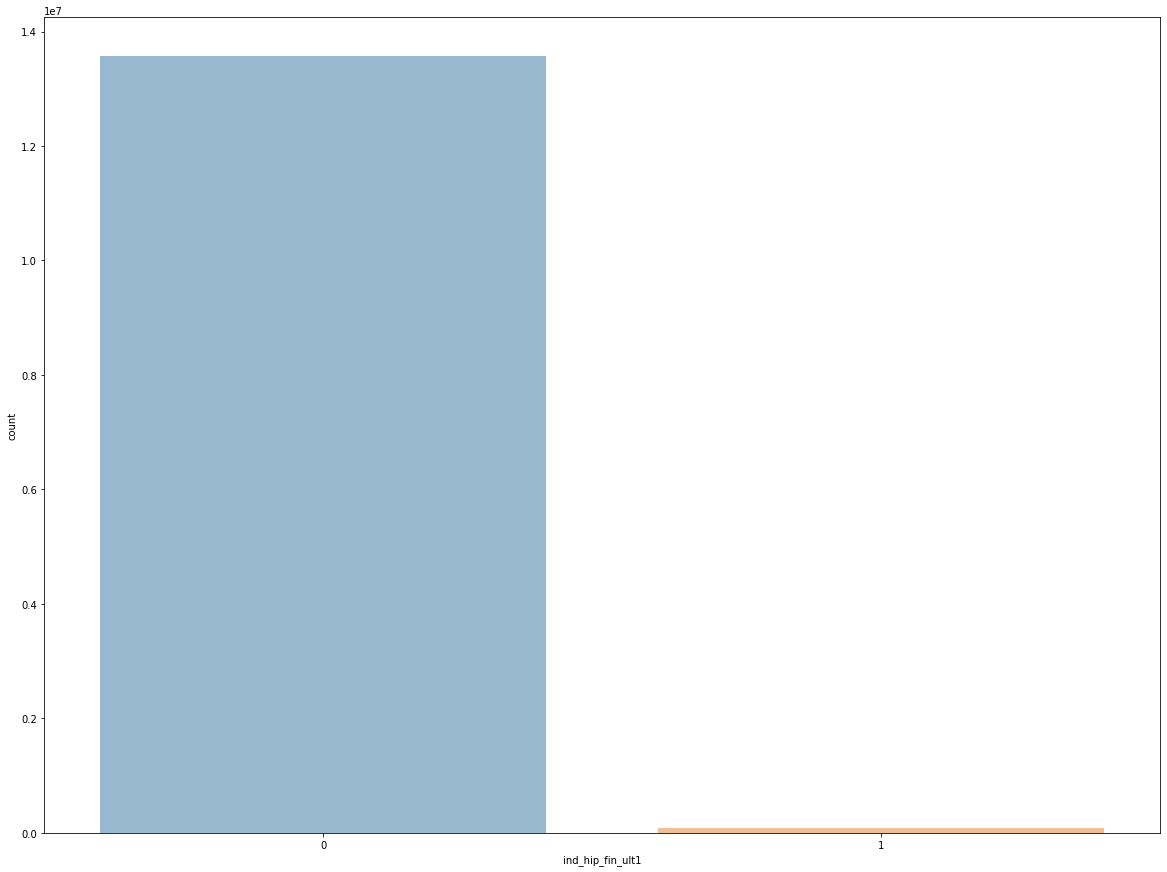

--------------------------------------------------
col :  ind_plan_fin_ult1


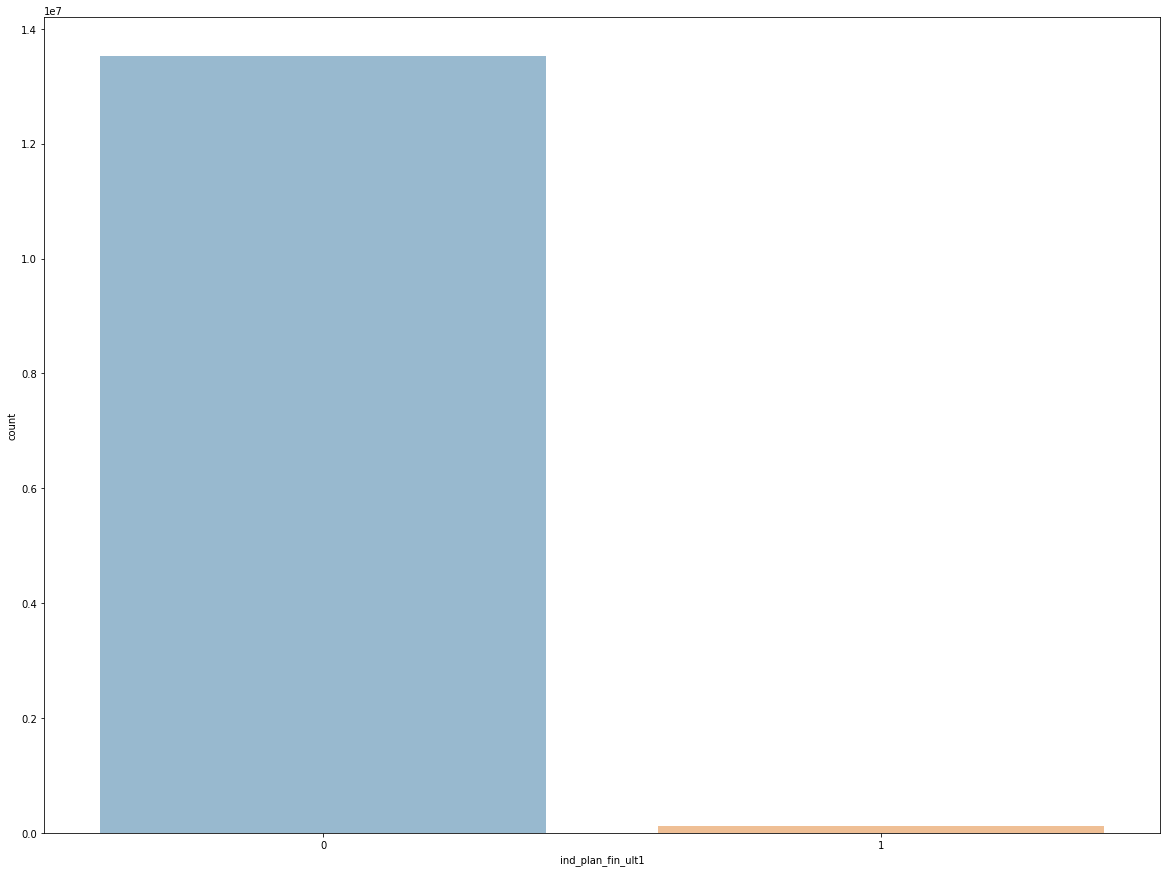

--------------------------------------------------
col :  ind_pres_fin_ult1


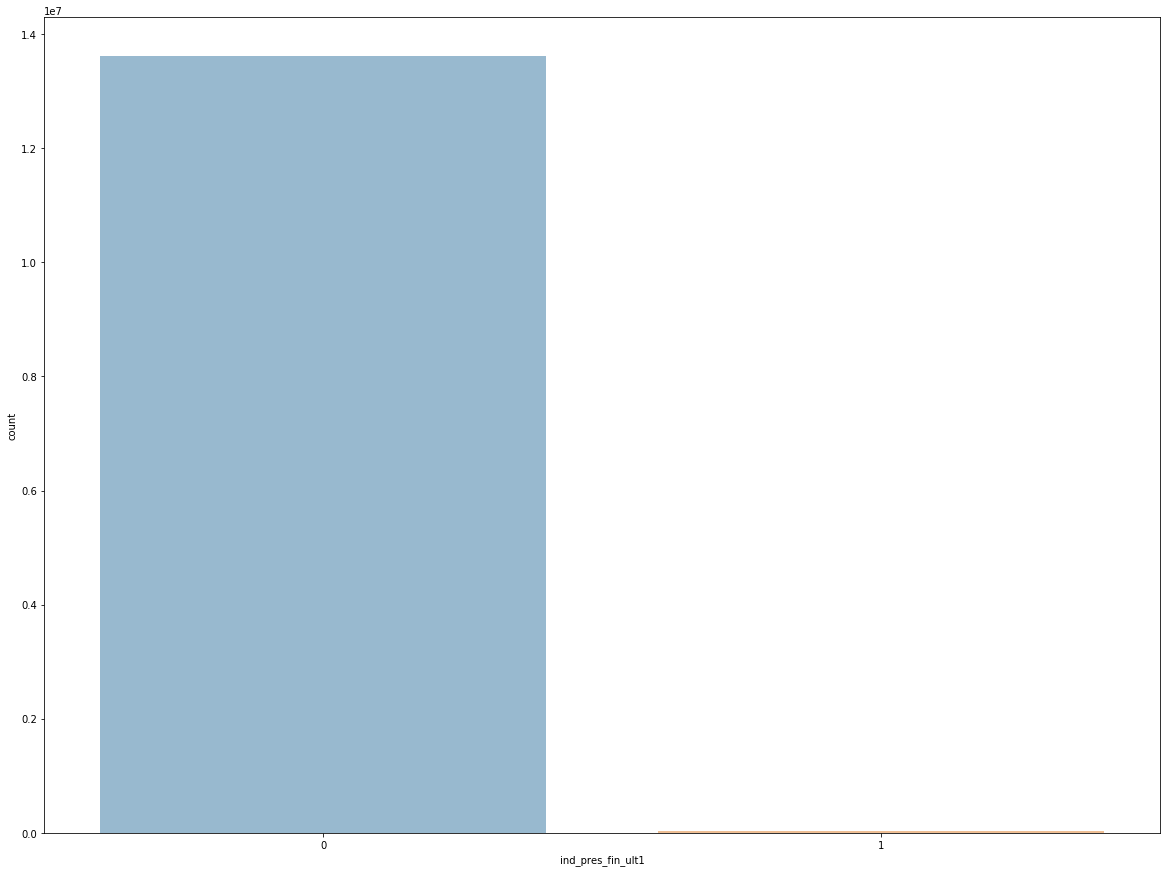

--------------------------------------------------
col :  ind_reca_fin_ult1


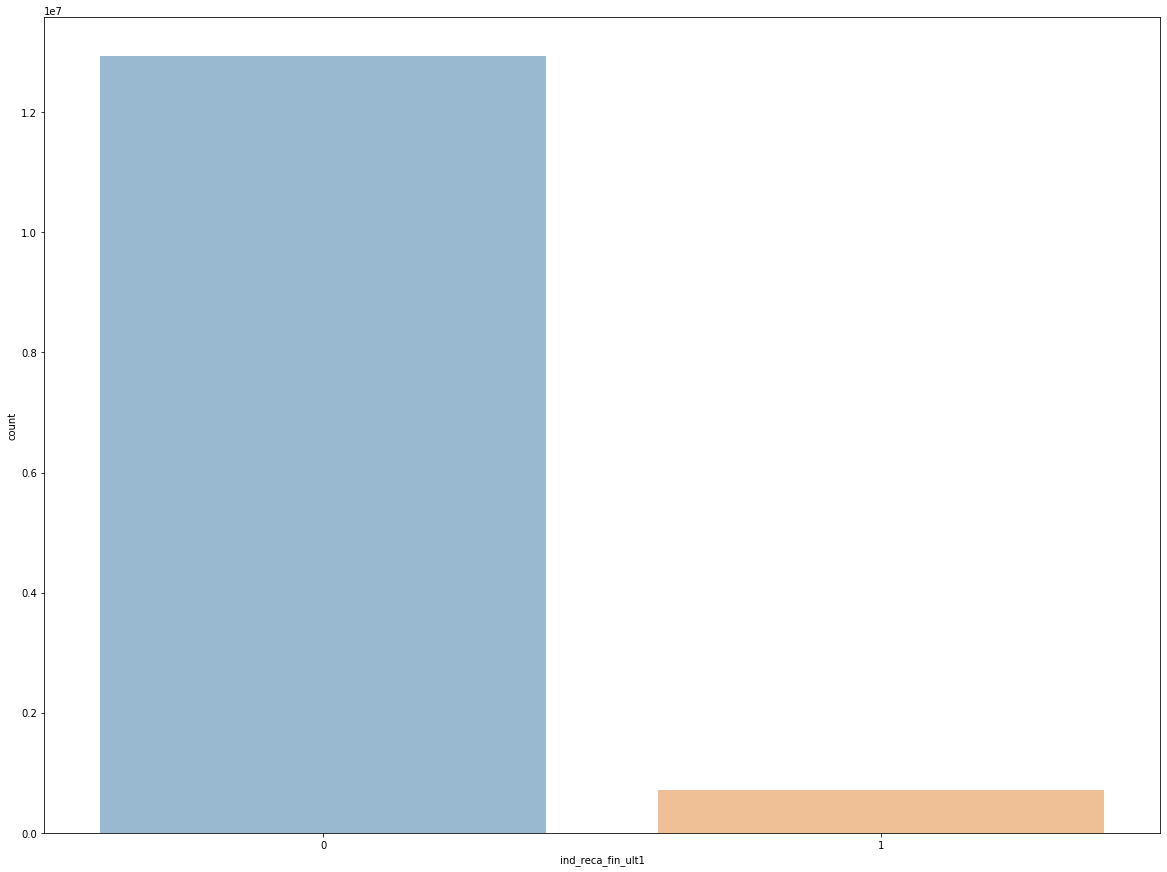

--------------------------------------------------
col :  ind_tjcr_fin_ult1


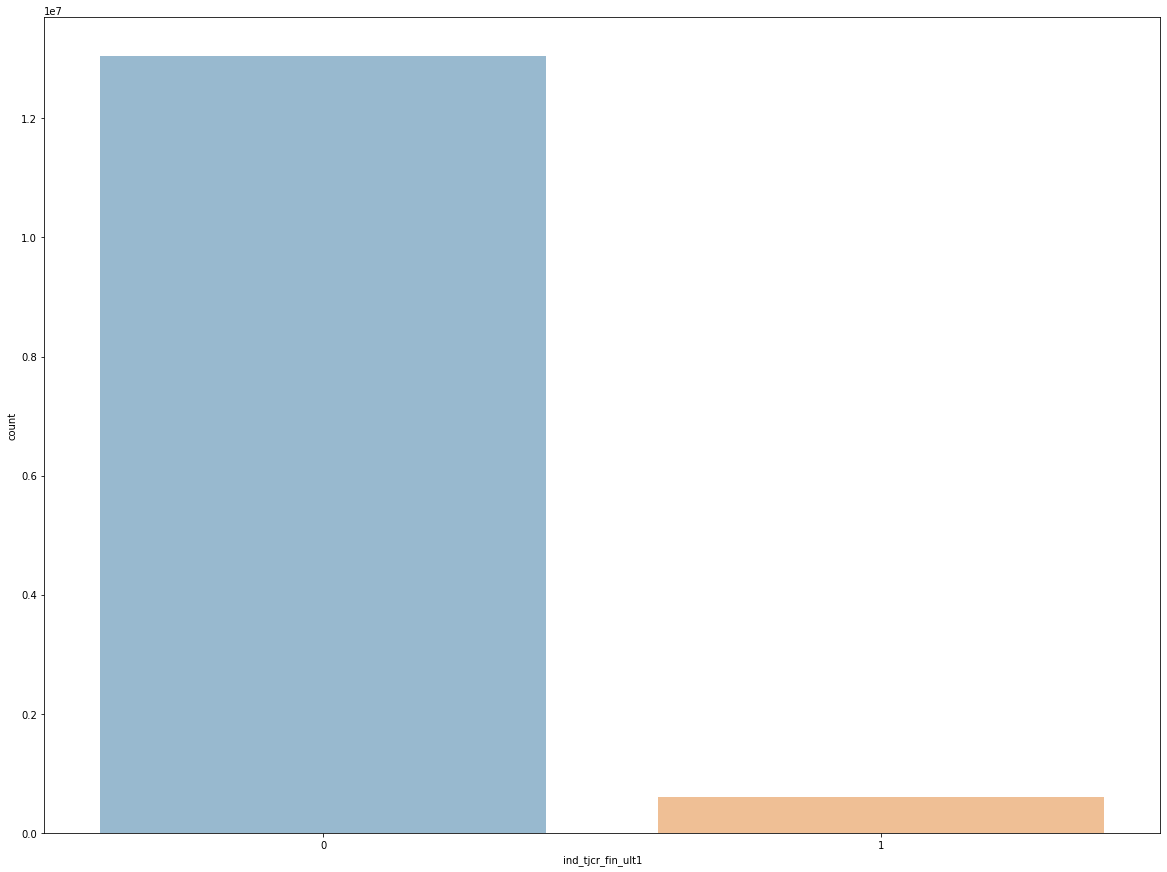

--------------------------------------------------
col :  ind_valo_fin_ult1


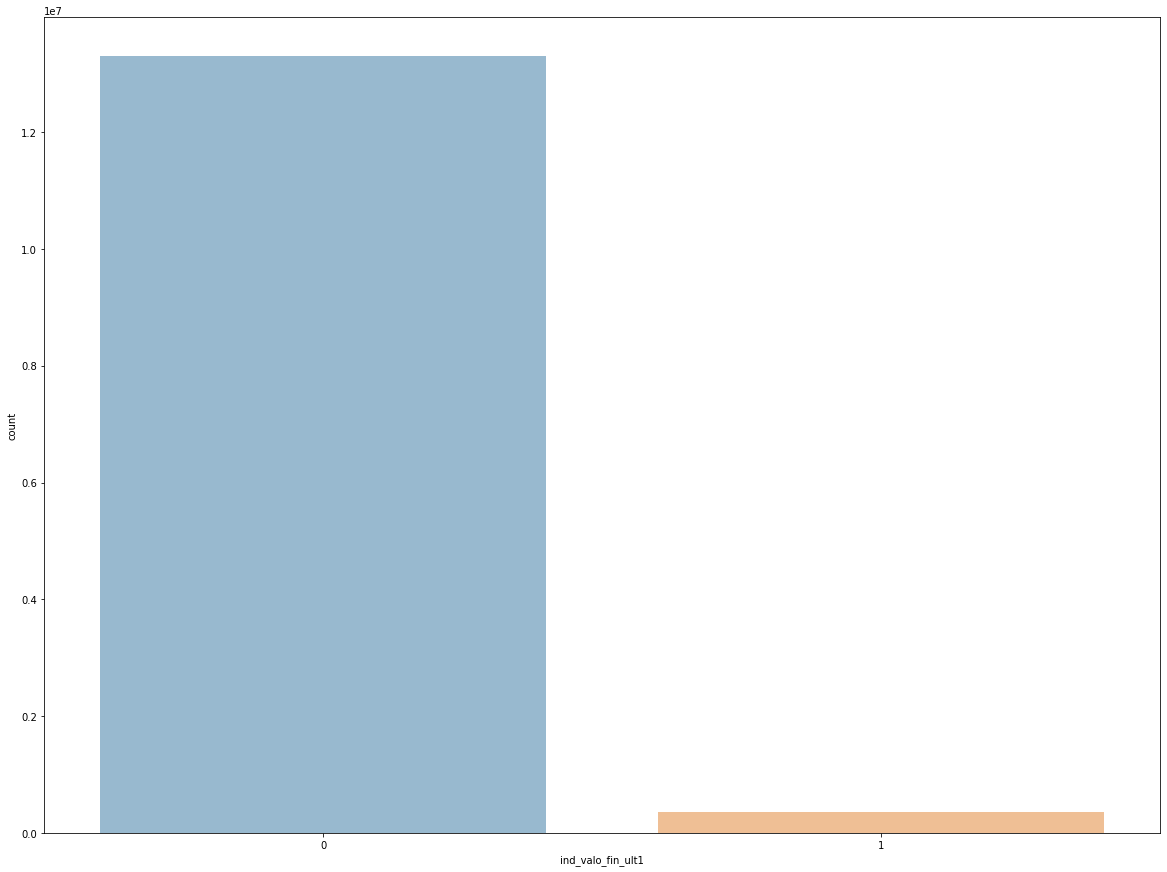

--------------------------------------------------
col :  ind_viv_fin_ult1


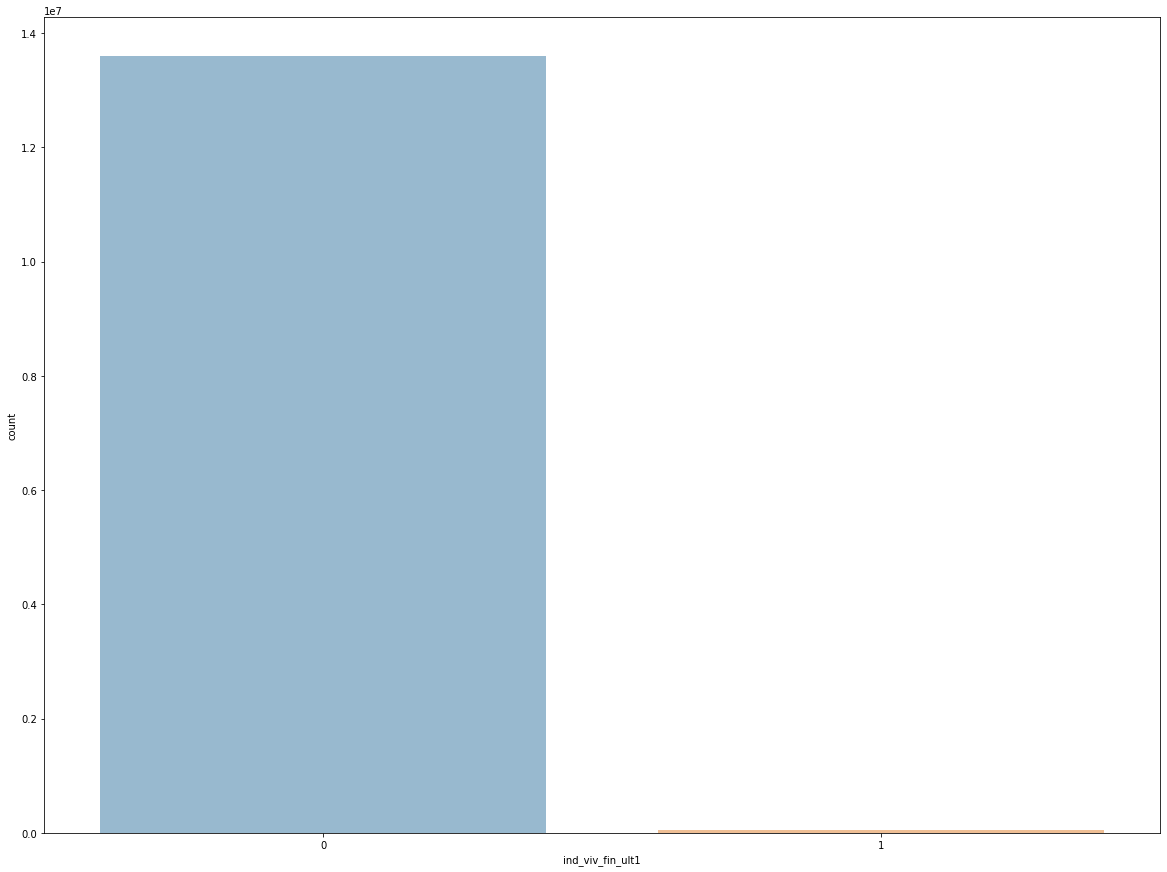

--------------------------------------------------
col :  ind_nomina_ult1


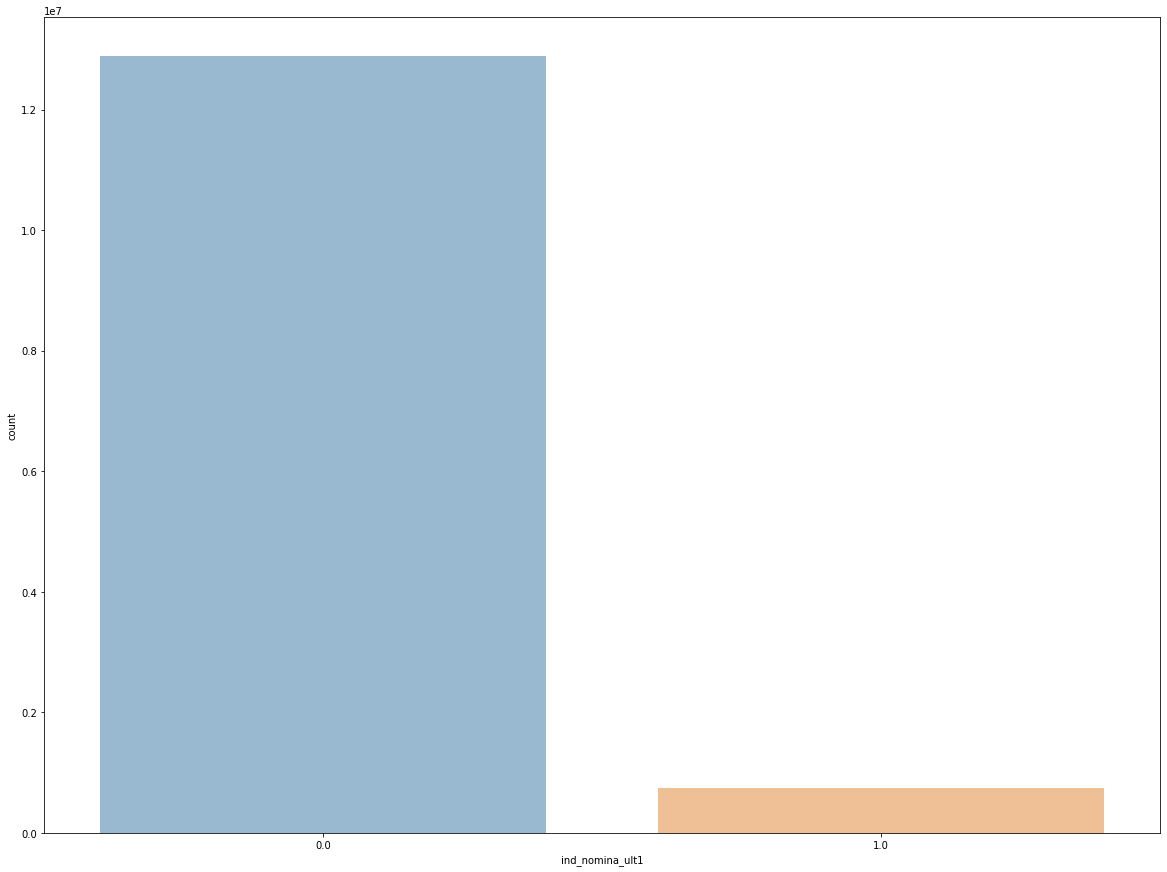

--------------------------------------------------
col :  ind_nom_pens_ult1


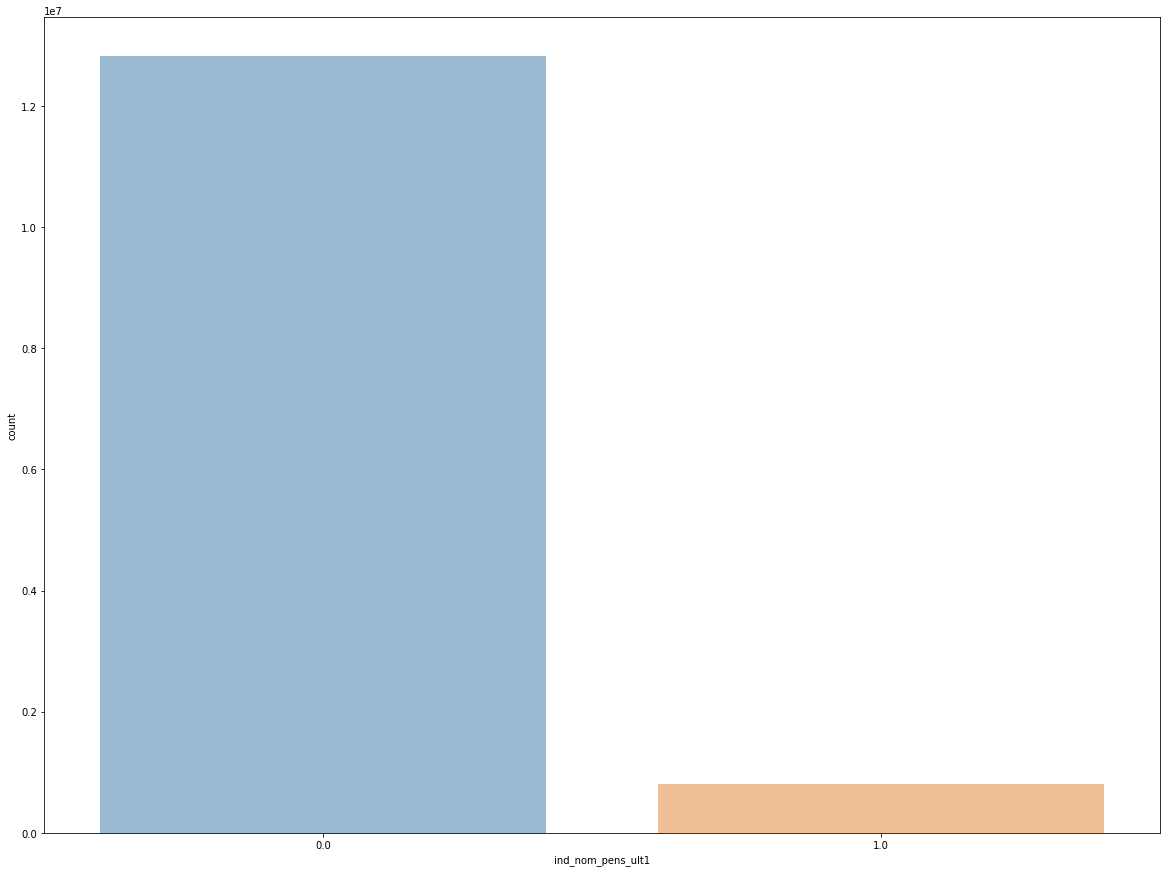

--------------------------------------------------
col :  ind_recibo_ult1


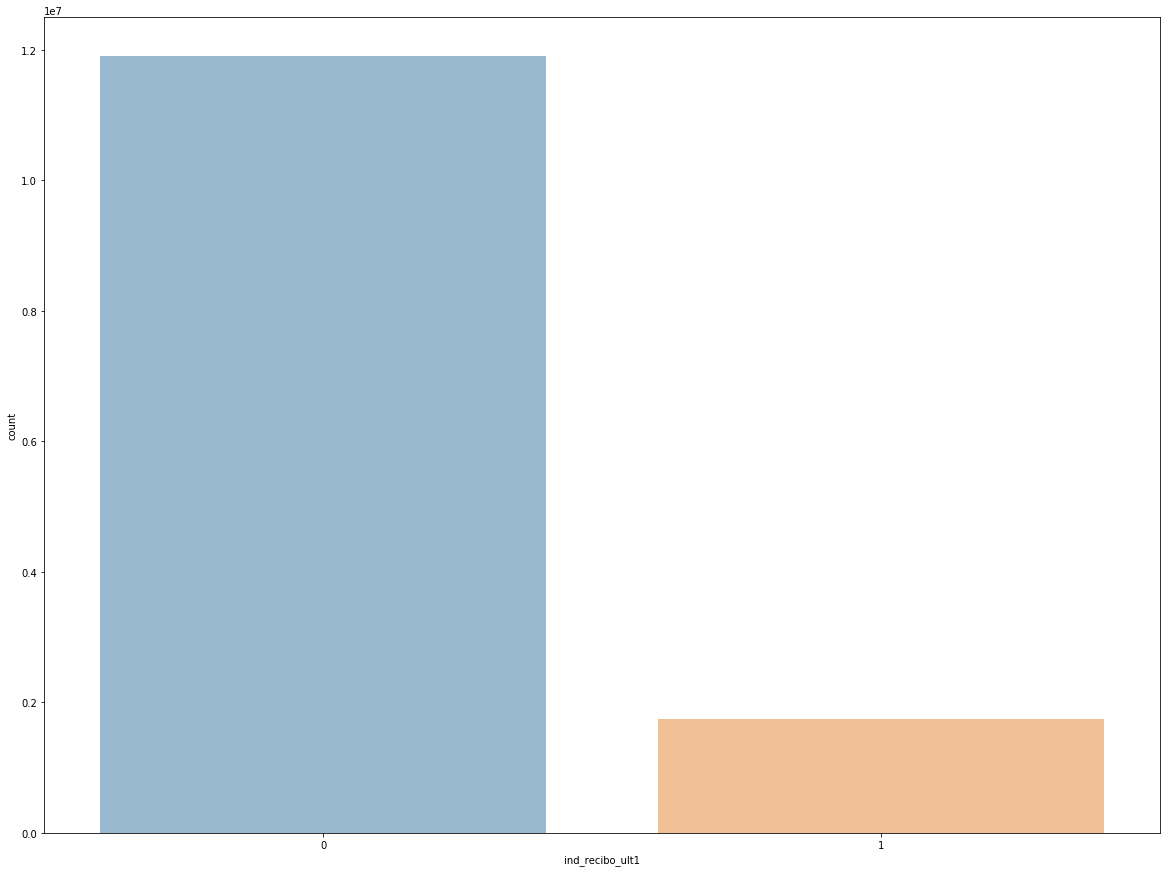

In [0]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    # 출력에 너무  시간이 많이 걸리는 두 변수는 skip한다
    if col in skip_cols:
        continue
    
    # 보기 편하게 영역 구분과 변수명을 출력한다.
    print('-' * 50)
    print('col : ', col)

    # 그래프 크기를(figsize) 설정한다.
    f, ax = plt.subplots(figsize = (20, 15))
    # seaborn을 사용한 막대 그래프를 생성한다.
    sns.countplot(x = col, data = trn, alpha = 0.5)
    # show() 함수를 통해 시각화한다.
    plt.show()

#### 결과 정리

- fecha_dato : 2015-01-28 ~ 2015-06-28 첫 6개월은 고객 데이터 개수가 같으며, 2015-07-28부터 매달 고객 데이터가 증가한다. 

- indrel_1mes : 막대 그래프를 보니 "1.0, 1.0, 1", 세 개의 동일한 값이 별도의 값인 것처럼 막대 그래프에 표시가 된다. 이는 데이터 타입이 object (혹은 string)값인 데이터에서 흔히 발견되는 현상이다. 전처리 과정에서 숫자 1을 의미하는 "1.0, 1.0, 1"을 모두 통일하고, 데이터를 정제해야 한다.

- 다른 변수에 대해선 책 참고

### 시계열 데이터 시각화

#### 월별 금융 보유 데이터를 누적 막대 그래프로 시각화하기

ValueError: ignored

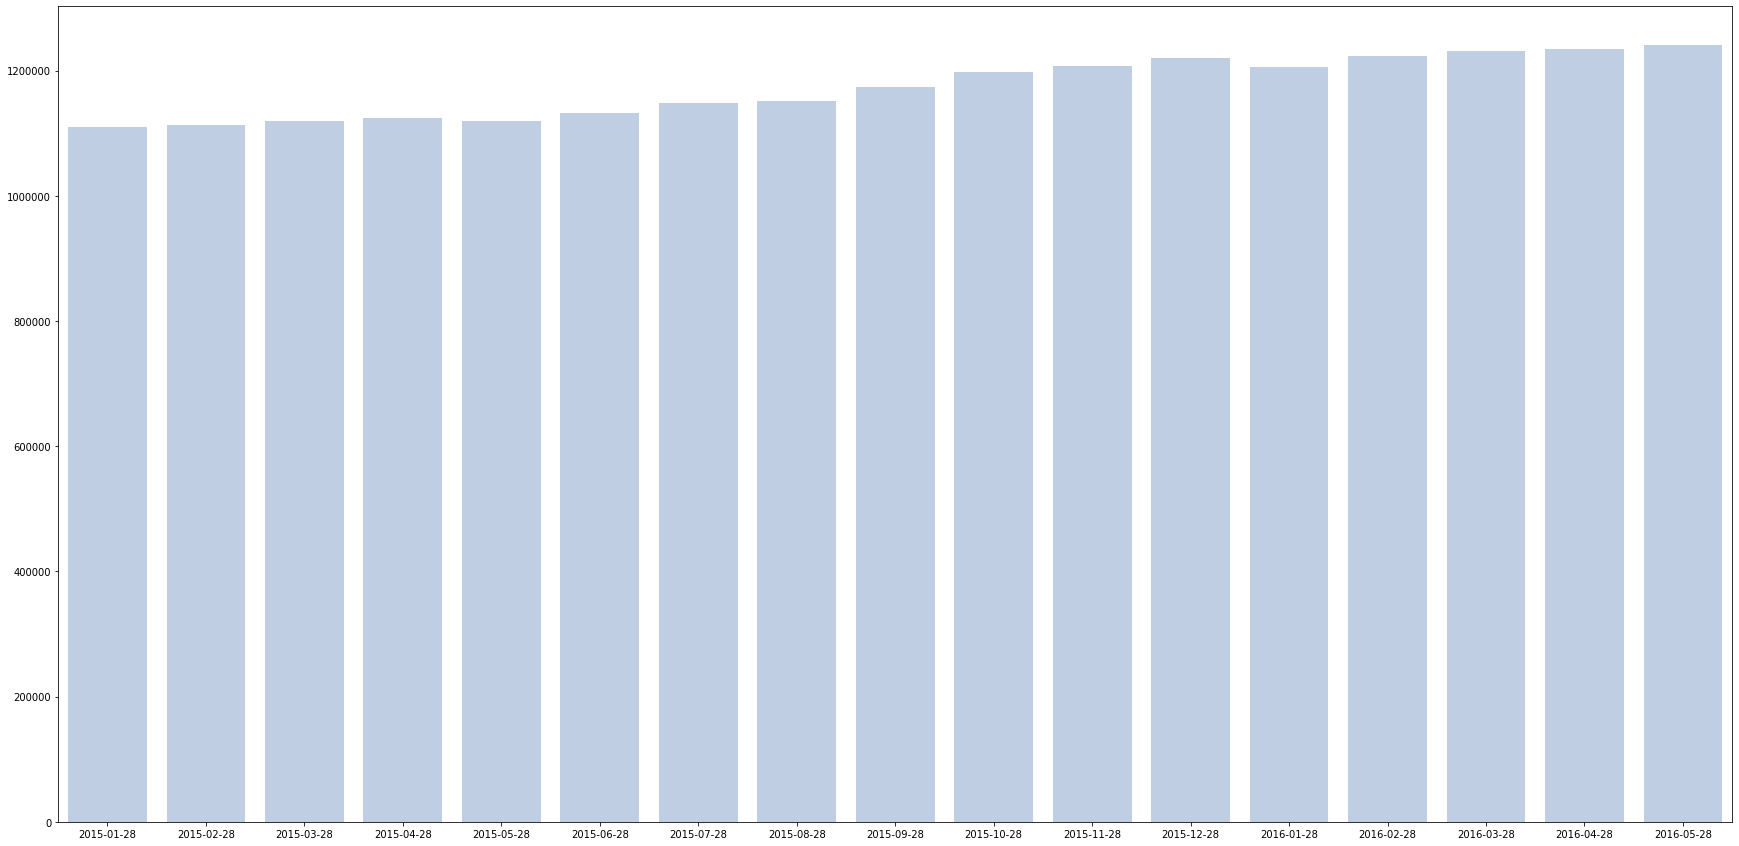

In [0]:
# 날짜 데이터를 기준으로 분석하기 위해, 날짜 데이터를 별도로 추출
months = trn['fecha_dato'].unique().tolist()

# 제품 변수 24개를 추출한다. 
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    # 매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산, label_sum에 저장
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
    # 누적 막대 그래프를 시각화 하기 위하여, n번째 제품의 총합을 1 ~ n번째 제품의 총합으로 만든다.
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis = 0))

# 시각화를 위하여 색을 지정
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', 'A2D9CE', 'ABEBC6', 'F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의한다.
f, ax = plt.subplots(figsize = (30, 15))
for i in range(len(label_cols)):
    # 24개 제품에 대하여 Histogram을 그린다.
    # x축에는 월 데이터, y축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정한다. 
    sns.barplot(x = months, y = label_sum_over_time[i], color = color_list[i%8], alpha = 0.7)

# 우측 상단에 Legend를 추가한다.
plt.legend([plt.Rectangle((0,0), 1, 1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncol = 2, prop = {'size':16})

#### 월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화 : 절대값이 아닌 월별 상대값으로 시각화하여 시각적으로 보기 쉽게 표현

ValueError: ignored

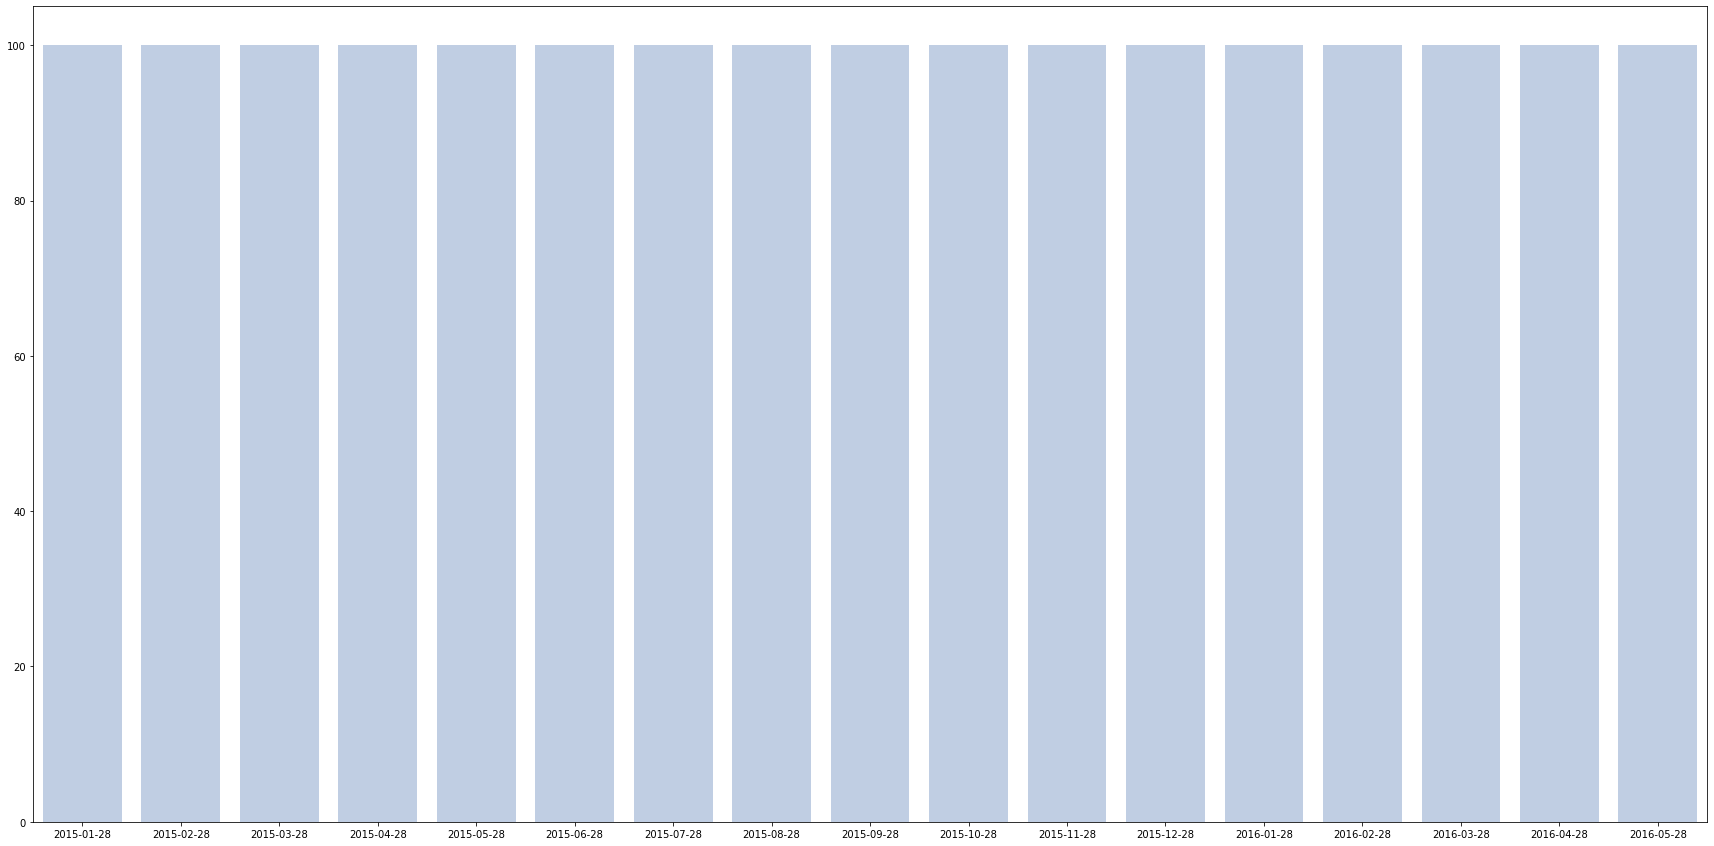

In [0]:
# label_sum_over_time의 값을 퍼센트 단위로 변환. 월마다 최댓값으로 나누고 100을 곱해준다.

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

# 앞선 코드와 동일한, 시각화 실행 코드
f, ax = plt.subplots(figsize = (30, 15))
for i in range(len(label_cols)):
    sns.barplot(x = months, y = label_sum_percent[i], color = color_list[i%8], alpha = 0.7)

plt.legend([plt.Rectangle((0, 0), 1, 1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncols = 2, prop = {'size': 16})

#### 24개 금융 제품에 대한 '신규 구매' 데이터를 생성하기

In [0]:
import numpy as np
import pandas as pd

# 훈련 데이터를 읽어온다.
trn = pd.read_csv('/content/drive/My Drive/ML/kaggle/santander_product_recommendation/input/train_ver2.csv')

# 제품 변수를 prods에 list형태로 저장한다.
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다.
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다.
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성. 변수명에 _prev를 추가한다.
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] 
else col for col in trn.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. lag 데이터의 int_date는 1 밀려있기 때문에, 저번 달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on = ['ncodpers', 'int_date'], how = 'left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다.
del trn, trn_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace = True)

# 원본 데이터에서의 제품 보유 여부 - lag 데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다.
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('/content/drive/My Drive/ML/Kaggle/santander_product_recommendation/input/labels.csv', index = False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


FileNotFoundError: ignored

#### 월별 신규 구매 데이터를 누적 막대 그래프로 시각화하기

In [0]:
labels = pd.read_csv('/content/drive/My Drive/ML/Kaggle/santander_product_recommendation/input/labels.csv').astype(int)
fecha_dato = pd.read_csv('/content/drive/My Drive/ML/Kaggle/santander_product_recommendation/input/train_ver2.csv', usecols = ['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis = 0))

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize = (30, 15))
for i in range(len(label_cols)):
    sns.barplot(x = months, y = label_sum_over_time[i], color = color_list[i%8], alpha = 0.7)

plt.legend([plt.Rectangle((0, 0), 1, 1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncols = 2, prop = {'size' : 16})

#### 월별 신규 구매 데이터를 누적 막대 그래프로 시각화하기 : 절댓값이 아닌 월별 상대값으로 시각화하여 시각적으로 보기 쉽게 표현한다.

ValueError: ignored

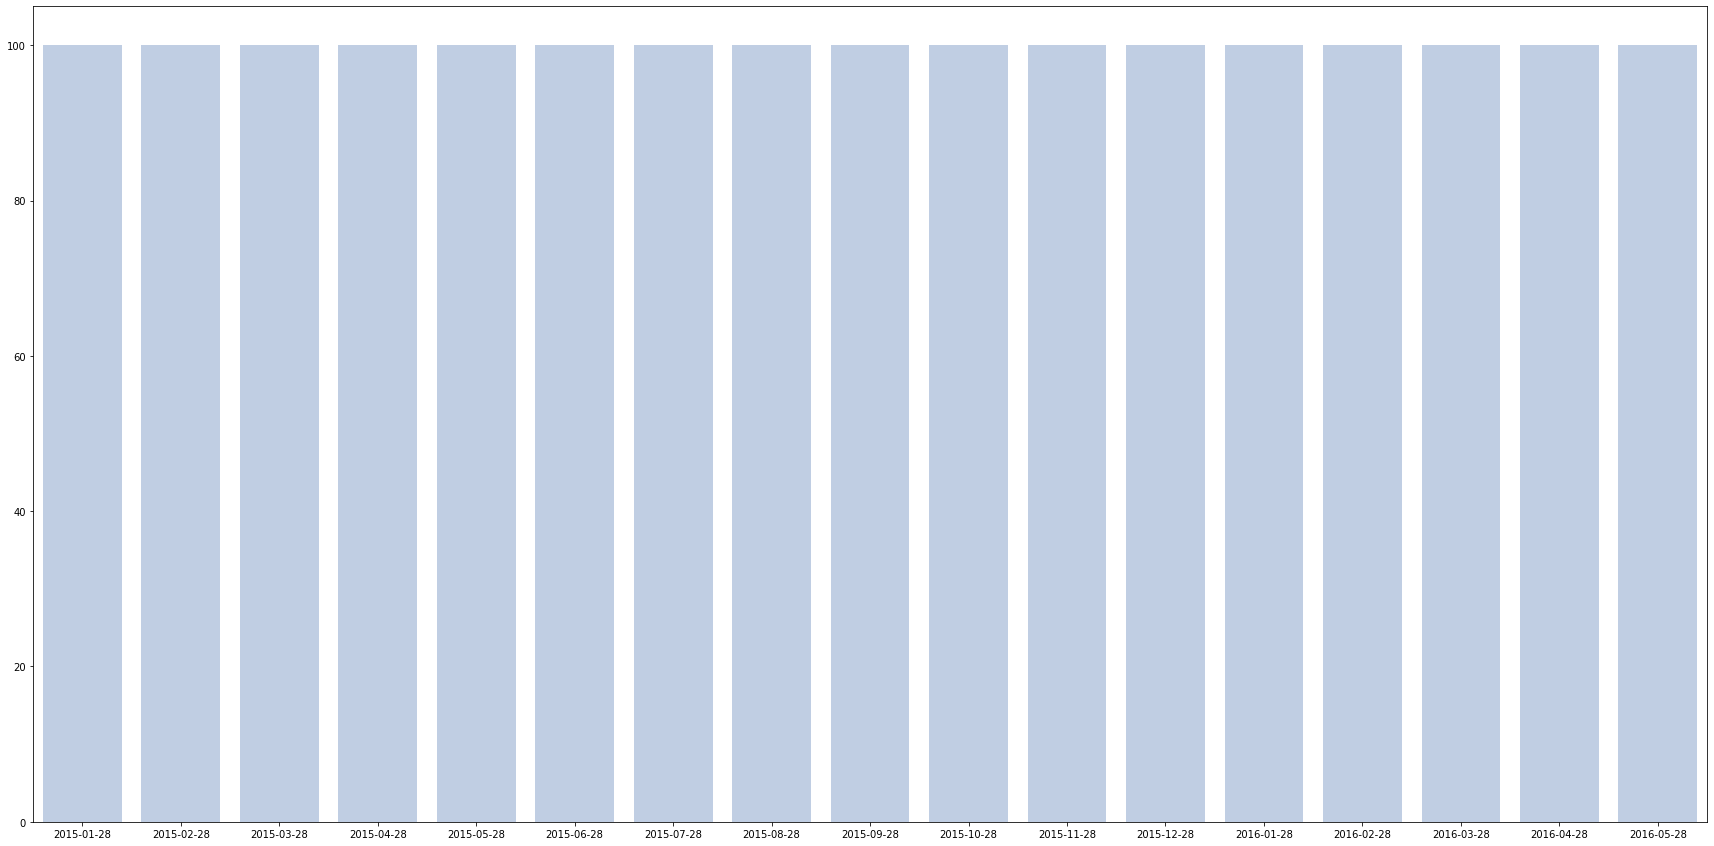

In [0]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis = 0))) * 100

f, ax = plt.subplots(figsize = (30, 15))
for i in range(len(label_cols)):
    sns.barplot(x = months, y = label_sum_percent[i], color = color_list[i%8], alpha = 0.7)

plt.legend([plt.Rectangle((0,0), 1, 1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc = 1, ncols = 2, prop = {'size' : 16})

### EDA 요약

참조 :  https://dandyrilla.github.io/2017-08-12/pandas-10min/